# fun_control_init

In [ ]:
from spotpython.utils.init import fun_control_init
fun_control = fun_control_init(_L_in=64, _L_out=11, num_workers=0, device=None)
fun_control

In [ ]:
import pandas as pd

def class_attributes_to_dataframe(class_obj):
    # Get the attributes and their values of the class object
    attributes = [attr for attr in dir(class_obj) if not callable(getattr(class_obj, attr)) and not attr.startswith("__")]
    values = [getattr(class_obj, attr) for attr in attributes]
    
    # Create a DataFrame from the attributes and values
    df = pd.DataFrame({'Attribute Name': attributes, 'Attribute Value': values})
    
    return df

# Example usage:
class MyClass:
    def __init__(self):
        self.name = "John"
        self.age = 30
        self.salary = 50000

my_instance = MyClass()
df = class_attributes_to_dataframe(my_instance)
print(df)



In [ ]:
import numpy as np
from math import inf
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
# number of initial points:
ni = 7
# number of points
n = 10

fun = analytical().fun_sphere
lower = np.array([-1])
upper = np.array([1])
design_control={"init_size": ni}

spot_1 = spot.Spot(fun=fun,
            lower = lower,
            upper= upper,
            fun_evals = n,
            show_progress=True,
            design_control=design_control,)
spot_1.run()


In [ ]:
from sys import stdout
df = spot_1.class_attributes_to_dataframe()
stdout.write(df.to_string())

In [ ]:
from river import datasets
from river import evaluate
from river.linear_model import LogisticRegression
from river import metrics
from river import optim
from river import preprocessing

dataset = datasets.Phishing()

model = (
    preprocessing.StandardScaler() |
    LogisticRegression()
)

metric = metrics.Accuracy()

evaluate.progressive_val_score(dataset, model, metric)


# Load CSV

In [ ]:
from spotpython.data.csvdataset import CSVDataset
# dataset = CSVDataset(csv_file='./data/spotpython/data.csv', target_column='prognosis')
dataset = CSVDataset(target_column='prognosis')
print(dataset.data.shape)
print(dataset.targets.shape)            

In [ ]:
dataset.extra_repr()

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 3
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# CSV Data set VBDP

In [ ]:
# load the csv_file='./data/spotpython/data.csv' as a pandas df and save it as a pickle file
import pandas as pd
df = pd.read_csv('./data/spotpython/data.csv')
df.to_pickle('./data/spotpython/data.pkl')


In [ ]:
from spotpython.data.csvdataset import CSVDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# PyHcf


In [ ]:
from pyhcf.data.daten_sensitive import DatenSensitive
from pyhcf.utils.names import get_short_parameter_names
daten = DatenSensitive()
df = daten.load()
names =  df.columns
names = get_short_parameter_names(names)
# rename columns with short names
df.columns = names
df.head()
# save the df as a csv file
df.to_csv('./data/spotpython/data_sensitive.csv', index=False)
# save the df as a pickle file
df.to_pickle('./data/spotpython/data_sensitive.pkl')
# remove all rows with NaN values
df = df.dropna()
# save the df as a csv file
df.to_csv('./data/spotpython/data_sensitive_rmNA.csv', index=False)
# save the df as a pickle file
df.to_pickle('./data/spotpython/data_sensitive_rmNA.pkl')


# PyHcf data loading

In [ ]:
# from spotpython.light.csvdataset import CSVDataset
# import torch
# dataset = CSVDataset(csv_file='./data/spotpython/data_sensitive.csv', target_column='N', feature_type=torch.float32, target_type=torch.float32)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5000
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     # print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

In [ ]:
# from spotpython.light.csvdataset import CSVDataset
# import torch
# dataset = CSVDataset(csv_file='./data/spotpython/data_sensitive.csv', target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=False)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5000
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     # print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

# Pickle data loading

In [ ]:
from spotpython.data.pkldataset import PKLDataset
import torch
dataset = PKLDataset(target_column='prognosis', feature_type=torch.long)
dataset.feature_type

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Data Sensitive

In [ ]:
from spotpython.light.pkldataset import PKLDataset
import torch
dataset = PKLDataset(pkl_file='./data/spotpython/data_sensitive.pkl', target_column='A', feature_type=torch.long, rmNA=False)

In [ ]:
# from torch.utils.data import DataLoader
# # Set batch size for DataLoader
# batch_size = 5
# # Create DataLoader
# dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# # Iterate over the data in the DataLoader
# for batch in dataloader:
#     inputs, targets = batch
#     print(f"Batch Size: {inputs.size(0)}")
#     print("---------------")
#     print(f"Inputs: {inputs}")
#     print(f"Targets: {targets}")
#     break

In [ ]:
from spotpython.data.pkldataset import PKLDataset
import torch
dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)

In [ ]:
from torch.utils.data import DataLoader
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Test lightdatamodule

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
from spotpython.data.pkldataset import PKLDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
# dataset = PKLDataset(directory="./data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)
print(len(dataset))

In [ ]:
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=7)

In [ ]:
data_module.setup()

In [ ]:
print(f"Training set size: {len(data_module.data_train)}")

In [ ]:
print(f"Validation set size: {len(data_module.data_val)}")

In [ ]:
print(f"Test set size: {len(data_module.data_test)}")

# Set the DataModule in fun_control 

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
from spotpython.data.pkldataset import PKLDataset
import torch
fun_control = fun_control_init()
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=7)
dm.setup()
set_control_key_value(control_dict=fun_control,
                key="data_module",
                value=dm, replace=True)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


## same with the sensitive data set

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.pkldataset import PKLDataset
import torch
fun_control = fun_control_init()
dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float64, rmNA=False)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=77)
dm.setup()
set_control_key_value(control_dict=fun_control,
                key="data_module",
                value=dm, replace=True)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


## same, but VBDO data set

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
import torch
fun_control = fun_control_init()
dataset = CSVDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/VBDP/", filename="train.csv",target_column='prognosis', feature_type=torch.long)
dm = LightDataModule(dataset=dataset, batch_size=5, test_size=77)
dm.setup()
set_control_key_value(control_dict=fun_control,
                key="data_module",
                value=dm, replace=True)
data_module = fun_control["data_module"]
print(f"Test set size: {len(data_module.data_test)}")


# load Hyperdict

In [ ]:
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
lhd = LightHyperDict()
lhd.hyper_dict
user_lhd = LightHyperDict(filename="user_hyper_dict.json", directory="./hyperdict/")
user_lhd.hyper_dict


# Diabetes data set

In [ ]:
from sklearn.datasets import load_diabetes  
import torch

# Load the diabetes dataset
feature_df, target_df = load_diabetes(return_X_y=True, as_frame=True)
feature_tensor = torch.tensor(feature_df.values, dtype=torch.float32)
target_tensor = torch.tensor(target_df.values, dtype=torch.float32)
feature_tensor


In [ ]:
from spotpython.data.diabetes import Diabetes
dataset = Diabetes()
print(dataset.data.shape)
print(dataset.targets.shape)

# add core model to fun control

In [ ]:
from spotpython.light.netlightregressione import NetLightRegression
from spotpython.utils.init import fun_control_init
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
fun_control["core_model"].__name__

In [ ]:
# check if the fun_control["core_model_hyper_dict"] is a LightHyperDict
isinstance(fun_control["core_model_hyper_dict"], dict)

# test check_X_shape

In [ ]:
import numpy as np
from spotpython.utils.init import fun_control_init
from spotpython.light.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.fun.hyperlight import HyperLight
from spotpython.hyperparameters.values import get_var_name
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
n_hyperparams = len(get_var_name(fun_control))
# generate a random np.array X with shape (2, n_hyperparams)
X = np.random.rand(2, n_hyperparams)
X == hyper_light.check_X_shape(X, fun_control)





# Test hyperlight fun

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.light.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotpython.fun.hyperlight import HyperLight
from spotpython.data.diabetes import Diabetes
from spotpython.hyperparameters.values import set_control_key_value
import numpy as np
fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,)

dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                    key="data_set",
                    value=dataset)

add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
X = get_default_hyperparameters_as_array(fun_control)
# combine X and X to a np.array with shape (2, n_hyperparams)
X = np.vstack((X, X))
y = hyper_light.fun(X, fun_control)
y


# test  NetLightRegression Class

In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.diabetes import Diabetes
from spotpython.light.netlightregression import NetLightRegression
from torch import nn
import lightning as L
PATH_DATASETS = './data'
BATCH_SIZE = 8

dataset = Diabetes()
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
batch_x, batch_y = next(iter(train_loader)) 
print(batch_x.shape)
print(batch_y.shape)

net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adam', dropout_prob=0.1, lr_mult=0.1,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)


# tests optimizer_handler

In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.diabetes import Diabetes
from spotpython.light.netlightregression import NetLightRegression
from torch import nn
import lightning as L

BATCH_SIZE = 8
lr_mult=0.1

dataset = Diabetes()
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adam', dropout_prob=0.1, lr_mult=lr_mult,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
# Adam uses a lr which is calculated as lr=lr_mult * 0.001, so this value
# should be 0.1 * 0.001 = 0.0001 
trainer.optimizers[0].param_groups[0]["lr"] == lr_mult*0.001


net_light_base = NetLightRegression(l1=128, epochs=10, batch_size=BATCH_SIZE,
                                initialization='xavier', act_fn=nn.ReLU(),
                                optimizer='Adadelta', dropout_prob=0.1, lr_mult=lr_mult,
                                patience=5, _L_in=10, _L_out=1)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
# Adadelta uses a lr which is calculated as lr=lr_mult * 1.0, so this value
# should be 1.0 * 0.1 = 0.1 
trainer.optimizers[0].param_groups[0]["lr"] == lr_mult*1.0


# Test train_model

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.light.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotpython.data.diabetes import Diabetes
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.hyperparameters.values import get_var_name, assign_values, generate_one_config_from_var_dict
from spotpython.light.traintest import train_model, test_model
fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,)

dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)

add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
var_dict = assign_values(X, get_var_name(fun_control))
for config in generate_one_config_from_var_dict(var_dict, fun_control):
    y_train = train_model(config, fun_control)
    y_test = test_model(config, fun_control)
    break
print(y_train)
print(y_test[0])


In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.light.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_as_array
from spotpython.data.diabetes import Diabetes
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.hyperparameters.values import get_var_name, assign_values, generate_one_config_from_var_dict
from spotpython.light.traintest import test_model


def test_traintest_test_model():
    fun_control = fun_control_init(
        _L_in=10,
        _L_out=1,)

    dataset = Diabetes()
    set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)

    add_core_model_to_fun_control(core_model=NetLightRegression,
                                fun_control=fun_control,
                                hyper_dict=LightHyperDict)
    X = get_default_hyperparameters_as_array(fun_control)
    var_dict = assign_values(X, get_var_name(fun_control))
    for vals in generate_one_config_from_var_dict(var_dict, fun_control):
        y_test = test_model(test_config=vals,
                            fun_control=fun_control)
        break
    # check if y is a float

# test getVarName()

In [ ]:
from spotpython.hyperparameters.values import get_var_name
fun_control = {"core_model_hyper_dict":{
            "leaf_prediction": {
                "levels": ["mean", "model", "adaptive"],
                "type": "factor",
                "default": "mean",
                "core_model_parameter_type": "str"},
            "leaf_model": {
                "levels": ["linear_model.LinearRegression", "linear_model.PARegressor", "linear_model.Perceptron"],
                "type": "factor",
                "default": "LinearRegression",
                "core_model_parameter_type": "instance"},
            "splitter": {
                "levels": ["EBSTSplitter", "TEBSTSplitter", "QOSplitter"],
                "type": "factor",
                "default": "EBSTSplitter",
                "core_model_parameter_type": "instance()"},
            "binary_split": {
                "levels": [0, 1],
                "type": "factor",
                "default": 0,
                "core_model_parameter_type": "bool"},
            "stop_mem_management": {
                "levels": [0, 1],
                "type": "factor",
                "default": 0,
                "core_model_parameter_type": "bool"}}}
len(get_var_name(fun_control))

# Test netlightregression

In [ ]:
import torch
import numpy as np
from spotpython.spot import spot
from math import inf
from spotpython.utils.init import fun_control_init
from spotpython.utils.file import get_experiment_name, get_spot_tensorboard_path
from spotpython.utils.device import getDevice
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.pkldataset import PKLDataset
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.hyperparameters.values import modify_hyper_parameter_bounds
from spotpython.hyperparameters.values import modify_hyper_parameter_levels
from spotpython.fun.hyperlight import HyperLight
from spotpython.hyperparameters.values import (get_bound_values,
    get_var_name,
    get_var_type,)
from spotpython.utils.eda import gen_design_table
from spotpython.hyperparameters.values import get_tuned_architecture
from spotpython.light.testmodel import test_model
from spotpython.light.loadmodel import load_light_from_checkpoint

MAX_TIME = 1
INIT_SIZE = 5
WORKERS = 0
PREFIX="031"

experiment_name = get_experiment_name(prefix=PREFIX)
fun_control = fun_control_init(
    spot_tensorboard_path=get_spot_tensorboard_path(experiment_name),
    num_workers=WORKERS,
    device=getDevice(),
    _L_in=133,
    _L_out=1,
    TENSORBOARD_CLEAN=True)

dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=True)
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)



add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
modify_hyper_parameter_bounds(fun_control, "l1", bounds=[5,8])
modify_hyper_parameter_bounds(fun_control, "epochs", bounds=[3,5])
modify_hyper_parameter_bounds(fun_control, "batch_size", bounds=[2, 8])
modify_hyper_parameter_levels(fun_control, "optimizer",["Adam", "AdamW", "Adamax", "NAdam"])

print(gen_design_table(fun_control))

var_type = get_var_type(fun_control)
var_name = get_var_name(fun_control)
lower = get_bound_values(fun_control, "lower")
upper = get_bound_values(fun_control, "upper")
fun = HyperLight(log_level=50).fun
spot_tuner = spot.Spot(fun=fun,
                       log_level=50,
                   lower = lower,
                   upper = upper,
                   fun_evals = inf,
                   max_time = MAX_TIME,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   var_type = var_type,
                   var_name = var_name,
                   show_progress= True,
                   fun_control = fun_control,
                   design_control={"init_size": INIT_SIZE},
                   surrogate_control={"noise": True,
                                      "min_theta": -4,
                                      "max_theta": 3,
                                      "n_theta": len(var_name),
                                      "model_fun_evals": 10_000,
                                      })
spot_tuner.run()

In [ ]:
spot_tuner.plot_progress(log_y=False, filename=None)

In [ ]:
print(gen_design_table(fun_control=fun_control, spot=spot_tuner))

In [ ]:
spot_tuner.plot_importance(threshold=0.025, filename=None)

In [ ]:
config = get_tuned_architecture(spot_tuner, fun_control)
print(config)

In [ ]:
test_model(config, fun_control)

In [ ]:
model_loaded = load_light_from_checkpoint(config, fun_control)

In [ ]:
model_loaded

In [ ]:
spot_tuner.plot_important_hyperparameter_contour(filename=None)

In [ ]:
spot_tuner.parallel_plot()

In [ ]:
from spotpython.light.cvmodel import cv_model
# set the number of folds to 10
fun_control["k_folds"] = 10
cv_model(config, fun_control)

# fun

In [ ]:
from spotpython.fun.objectivefunctions import analytical
import numpy as np
y = np.array([1, 2, 3, 4, 5])
fun = analytical(sigma=1.0, seed=123)
fun.add_noise(y)


In [ ]:
from spotpython.fun.objectivefunctions import analytical
import numpy as np
print(np.array([1, 2, 3, 4, 5]))



In [ ]:
import numpy as np
from math import inf
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from spotpython.utils.init import fun_control_init
fun_control = fun_control_init(seed=4321, sigma=0.1)
fun = analytical(seed=222, sigma=0.0).fun_sphere

In [ ]:
spot_1 = spot.Spot(fun=fun,
                   lower = np.array([-10]),
                   upper = np.array([100]),
                   fun_evals = 100,
                   fun_repeats = 3,
                   max_time = inf,
                   noise = True,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   var_type=["num"],
                   infill_criterion = "y",
                   n_points = 1,
                   seed=111,
                   log_level = 10,
                   show_models=False,
                   fun_control = fun_control,
                   design_control={"init_size": 5,
                                   "repeats": 1},
                   surrogate_control={"noise": True,
                                      "cod_type": "norm",
                                      "min_theta": -4,
                                      "max_theta": 3,
                                      "n_theta": 1,
                                      "model_optimizer": differential_evolution,
                                      "model_fun_evals": 1000,
                                      })
spot_1.run()

In [ ]:
import numpy as np
def squared_euclidean_distance(X_0, X, theta):
    return np.sum(theta*(X_0 - X)**2)

In [ ]:
import numpy as np
from numpy import array, zeros, power, ones, exp, multiply, eye, linspace, mat, spacing, sqrt, arange, append, ravel
from numpy.linalg import cholesky, solve
from numpy.random import multivariate_normal
def build_Psi(X, theta):
    n = X.shape[0]
    k = X.shape[1]
    D = zeros((k, n, n))
    for l in range(k):
        for i in range(n):
            for j in range(i, n):
                D[l, i, j] = theta[l]*(X[i,l] - X[j,l])**2
    D = sum(D)
    D = D + D.T
    return exp(-D)  

In [ ]:
theta = np.array([1.0, 1.0])
X = np.array([[1.0, 0.0], [1.0, 1.0], [0.0, 1.0]])
print(X.shape)
X

In [ ]:
build_Psi(X, theta)

In [ ]:
from spotpython.fun.objectivefunctions import analytical
import numpy as np
X = np.array([[0, 0, 0], [0, 0, 1], [0, 0, 2]])
fun = analytical()
fun.fun_branin_factor(X)

In [ ]:
import numpy as np
pi = np.pi
X = np.array([[0,0], [-pi, 12.275], [pi, 2.275], [9.42478, 2.475]])
fun = analytical()
fun.fun_branin(X)

In [ ]:
from spotpython.fun.objectivefunctions import analytical
import numpy as np
pi = np.pi
X_0 = np.array([[0, 0]])
X_1 = np.array([[-pi, 12.275], [pi, 2.275], [9.42478, 2.475]])
X_2 = np.array([[0,0,0], [0,0,1], [0,0,2]])
fun = analytical()
y_0 = fun.fun_branin(X_0)
y_1 = fun.fun_branin(X_1)
y_2 = fun.fun_branin_factor(X_2)

In [ ]:
round(y_1[0], 2) == round(y_1[1],2)


In [ ]:

round(y_1[0], 2) == round(y_1[2],2)


In [ ]:

y_2[0] == y_0


In [ ]:

y_2[1] == y_0 + 10


In [ ]:

y_2[2] == y_0 - 10


In [ ]:
from numpy.random import multivariate_normal
import numpy as np
n = 100
X = np.linspace(0, 10, n, endpoint=False).reshape(-1,1)
X.shape

In [ ]:
import numpy as np
from numpy import array, zeros, power, ones, exp, multiply, eye, linspace, mat, spacing, sqrt, arange, append, ravel
from numpy.linalg import cholesky, solve
from numpy.random import multivariate_normal
def build_Psi(X, theta):
    n = X.shape[0]
    k = X.shape[1]
    D = zeros((k, n, n))
    for l in range(k):
        for i in range(n):
            for j in range(i, n):
                D[l, i, j] = theta[l]*(X[i,l] - X[j,l])**2
    D = sum(D)
    D = D + D.T
    return exp(-D)  

In [ ]:
theta = np.array([1.0])
Psi = build_Psi(X, theta)
np.round(Psi[:3,:], 3)

In [ ]:
Y = multivariate_normal(zeros(Psi.shape[0]), Psi, size = (3, 1, 1), check_valid="raise")
Y.shape

In [ ]:
# convert Y to a 3 x 100 array
Y = np.squeeze(Y)
Y.shape
Y

In [ ]:
# plot 3 samples from the GP as a function of X
import matplotlib.pyplot as plt
plt.plot(X, Y.T)


In [ ]:
Y = multivariate_normal(zeros(Psi.shape[0]), Psi, size = 3, check_valid="raise")
Y.shape

In [ ]:
# plot 3 samples from the GP as a function of X
import matplotlib.pyplot as plt
plt.plot(X, Y.T)

# Data Loader

In [ ]:
from spotpython.data.pkldataset import PKLDataset
import torch
from torch.utils.data import DataLoader
# dataset = PKLDataset(target_column='prognosis', feature_type=torch.long)
dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=True)
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

## Test HyperLight

In [ ]:
import numpy as np
from spotpython.utils.init import fun_control_init
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.fun.hyperlight import HyperLight
from spotpython.hyperparameters.values import get_var_name
fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                            fun_control=fun_control,
                            hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
n_hyperparams = len(get_var_name(fun_control))
# generate a random np.array X with shape (2, n_hyperparams)
X = np.random.rand(2, n_hyperparams)
X == hyper_light.check_X_shape(X, fun_control)

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (add_core_model_to_fun_control,
    get_default_hyperparameters_as_array)
from spotpython.fun.hyperlight import HyperLight
from spotpython.data.diabetes import Diabetes
from spotpython.hyperparameters.values import set_control_key_value
import numpy as np
fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,)
dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset)
add_core_model_to_fun_control(core_model=NetLightRegression,
                            fun_control=fun_control,
                            hyper_dict=LightHyperDict)
hyper_light = HyperLight(seed=126, log_level=50)
X = get_default_hyperparameters_as_array(fun_control)
# combine X and X to a np.array with shape (2, n_hyperparams)
# so that two values are returned
X = np.vstack((X, X))
hyper_light.fun(X, fun_control)


## test pkldataset

In [ ]:
from spotpython.data.pkldataset import PKLDataset
import torch
from torch.utils.data import DataLoader
# dataset = PKLDataset(target_column='prognosis', feature_type=torch.long)
dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/",
                    filename="data_sensitive.pkl",
                    target_column='N',
                    feature_type=torch.float32,
                    target_type=torch.float32,
                    rmNA=True)
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

In [ ]:
import pytest
import numpy as np
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import get_bound_values
from spotpython.hyperparameters.values import get_control_key_value, set_control_key_value
from spotpython.hyperparameters.values import get_var_type_from_var_name

fun_control = fun_control_init()
set_control_key_value(control_dict=fun_control, key="var_type", value=["int", "float", "str"], replace=True)
set_control_key_value(control_dict=fun_control, key="var_name", value=["max_depth", "learning_rate", "model_type"], replace=True)

print(fun_control)

# Test with existing var_name
assert get_var_type_from_var_name(var_name="max_depth", fun_control=fun_control) == "int"
assert get_var_type_from_var_name(var_name="learning_rate", fun_control=fun_control) == "float"
assert get_var_type_from_var_name(var_name="model_type", fun_control=fun_control) == "str"

# Test with non-existing var_name
with pytest.raises(ValueError):
    get_var_type_from_var_name(var_name="non_existing", fun_control=fun_control)

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import get_control_key_value
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.hyperparameters.values import get_var_type_from_var_name

fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                    fun_control=fun_control,
                    hyper_dict=LightHyperDict)
var_type = get_control_key_value(control_dict=fun_control, key="var_type")
var_name = get_control_key_value(control_dict=fun_control, key="var_name")
print(var_type)
print(var_name)
vn = "l1"
get_var_type_from_var_name(fun_control=fun_control, var_name=vn)

assert var_type[var_name.index(vn)] == "int"
assert get_var_type_from_var_name(fun_control, vn) == "int"
vn = "initialization"
assert var_type[var_name.index(vn)] == "factor"
assert var_type[var_name.index(vn)] == "factor"

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import get_control_key_value
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.hyperparameters.values import set_control_hyperparameter_value

fun_control = fun_control_init()
add_core_model_to_fun_control(core_model=NetLightRegression,
                    fun_control=fun_control,
                    hyper_dict=LightHyperDict)
set_control_hyperparameter_value(control_dict=fun_control, hyperparameter="l1", value=[1,7])
set_control_hyperparameter_value(control_dict=fun_control, hyperparameter="initialization", value=["xavier2", "kaiming2"])
print(fun_control)


## get names

In [ ]:
def get_entry(dictionary, key, i):
    if key in dictionary:
        if 'levels' in dictionary[key]:
            if i < len(dictionary[key]['levels']):
                return dictionary[key]['levels'][i]
    return None

In [ ]:
import torch
from spotpython.data.pkldataset_intern import PKLDataset
from spotpython.utils.device import getDevice
from spotpython.utils.init import fun_control_init
from spotpython.utils.file import get_experiment_name, get_spot_tensorboard_path
import numpy as np
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.utils.eda import gen_design_table
from math import inf

MAX_TIME = 60
FUN_EVALS = inf
INIT_SIZE = 25
WORKERS = 0
PREFIX="031"
DEVICE = getDevice()


experiment_name = get_experiment_name(prefix=PREFIX)
fun_control = fun_control_init(
    spot_tensorboard_path=get_spot_tensorboard_path(experiment_name),
    _L_in=10,
    _L_out=1,
    TENSORBOARD_CLEAN=True,
    device=DEVICE,
    enable_progress_bar=False,
    fun_evals=FUN_EVALS,
    log_level=10,
    max_time=MAX_TIME,
    num_workers=WORKERS,
    show_progress=True,
    tolerance_x=np.sqrt(np.spacing(1)),
    )

dataset = Diabetes()
dataset = PKLDataset(directory="/Users/bartz/workspace/spotpython/notebooks/data/spotpython/", filename="data_sensitive.pkl", target_column='N', feature_type=torch.float32, target_type=torch.float32, rmNA=True, rmMF=True)
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset,
                        replace=True)

set_control_key_value(control_dict=fun_control,
                        key="_L_in",
                        value=133,
                        replace=True)


add_core_model_to_fun_control(core_model=NetLightRegression,
                              fun_control=fun_control,
                              hyper_dict=LightHyperDict)
# from spotpython.hyperparameters.values import modify_hyper_parameter_bounds

from spotpython.hyperparameters.values import set_control_hyperparameter_value
set_control_hyperparameter_value(fun_control, "l1", [3,8])
set_control_hyperparameter_value(fun_control, "epochs", [4,9])
set_control_hyperparameter_value(fun_control, "batch_size", [1, 4])
set_control_hyperparameter_value(fun_control, "optimizer", ["Adam", "AdamW", "Adamax", "NAdam"])

In [ ]:
fun_control

In [ ]:
def get_entry(dictionary, key, i):
    if 'core_model_hyper_dict' in dictionary:
        if key in dictionary['core_model_hyper_dict']:
            if 'levels' in dictionary['core_model_hyper_dict'][key]:
                if i < len(dictionary['core_model_hyper_dict'][key]['levels']):
                    return dictionary['core_model_hyper_dict'][key]['levels'][i]
    return None
print(get_entry(fun_control, "optimizer", 0)) 

In [ ]:
from spotpython.utils.device import getDevice
from spotpython.utils.init import fun_control_init
from spotpython.utils.file import get_experiment_name, get_spot_tensorboard_path
import numpy as np
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
from spotpython.hyperparameters.values import get_ith_hyperparameter_name_from_fun_control
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.hyperparameters.values import set_control_hyperparameter_value
experiment_name = get_experiment_name(prefix="000")
fun_control = fun_control_init(
    spot_tensorboard_path=get_spot_tensorboard_path(experiment_name),
    _L_in=10,
    _L_out=1,
    TENSORBOARD_CLEAN=True,
    device=getDevice(),
    enable_progress_bar=False,
    fun_evals=15,
    log_level=10,
    max_time=1,
    num_workers=0,
    show_progress=True,
    tolerance_x=np.sqrt(np.spacing(1)),
    )
dataset = Diabetes()
set_control_key_value(control_dict=fun_control,
                        key="data_set",
                        value=dataset,
                        replace=True)
add_core_model_to_fun_control(core_model=NetLightRegression,
                            fun_control=fun_control,
                            hyper_dict=LightHyperDict)

set_control_hyperparameter_value(fun_control, "l1", [3,8])
set_control_hyperparameter_value(fun_control, "optimizer", ["Adam", "AdamW", "Adamax", "NAdam"])
assert get_ith_hyperparameter_name_from_fun_control(fun_control, key="optimizer", i=0) == "Adam"

In [ ]:
import datetime

def get_timestamp(only_int=True):
    dt = datetime.datetime.now().isoformat(sep=" ", timespec="microseconds")
    if only_int:
        # remove - . : and space
        dt = dt.replace("-", "")
        dt = dt.replace(".", "")
        dt = dt.replace(":", "")
        dt = dt.replace(" ", "")
    return dt


In [ ]:
import pytest
import numpy as np
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, surrogate_control_init, design_control_init
)

def test_plot_progress():
    # number of initial points:
    ni = 7
    # number of points
    fun_evals = 10
    fun = analytical().fun_sphere
    fun_control = fun_control_init(
        lower = np.array([-1, -1]),
        upper = np.array([1, 1]),
        fun_evals=fun_evals,
        tolerance_x = np.sqrt(np.spacing(1))
    )
    design_control=design_control_init(init_size=ni)
    surrogate_control=surrogate_control_init(n_theta=3)
    S = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    design_control=design_control,
                    surrogate_control=surrogate_control,)
    S.run()

    # Test plot_progress with different parameters
    S.plot_progress(show=False)  # Test with show=False
    S.plot_progress(log_x=True, show=False)  # Test with log_x=True
    S.plot_progress(log_y=True, show=False)  # Test with log_y=True
    S.plot_progress(filename="test_plot.png", show=False)  # Test with a different filename
    # add NaN to S.y at position 2
    S.y[2] = np.nan
    S.plot_progress(show=False)  # Test with show=False



In [ ]:
import pytest
import numpy as np
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, surrogate_control_init, design_control_init
)


# number of initial points:
ni = 7
# number of points
fun_evals = 10
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]),
    fun_evals=fun_evals,
    tolerance_x = np.sqrt(np.spacing(1))
)
design_control=design_control_init(init_size=ni)
surrogate_control=surrogate_control_init(n_theta=3)
S = spot.Spot(fun=fun,
                fun_control=fun_control,
                design_control=design_control,
                surrogate_control=surrogate_control,)
S.run()

# remove points from S.y so that there are less than ni points
S.y = S.y[:3]
# Test plot_progress with different parameters
S.plot_progress(show=False)  # Test with show=False
S.plot_progress(log_x=True, show=False)  # Test with log_x=True
S.plot_progress(log_y=True, show=False)  # Test with log_y=True
S.plot_progress(filename="test_plot.png", show=False)  # Test with a different filename

In [ ]:
import numpy as np
from math import inf
from spotpython.spot import spot
from scipy.optimize import differential_evolution
from spotpython.utils.init import (
    fun_control_init,
    design_control_init,
    surrogate_control_init,
    optimizer_control_init)
def objective_function(X, fun_control=None):
    if not isinstance(X, np.ndarray):
        X = np.array(X)
    if X.shape[1] != 2:
        raise Exception
    x0 = X[:, 0]
    x1 = X[:, 1]
    y = x0**2 + 10*x1**2
    return y
fun_control = fun_control_init(
            lower = np.array([0, 0]),
            upper = np.array([10, 10]),
            fun_evals=8,
            fun_repeats=1,
            max_time=inf,
            noise=True,
            tolerance_x=0,
            ocba_delta=0,
            var_type=["num", "num"],
            infill_criterion="ei",
            n_points=1,
            seed=123,
            log_level=10,
            show_models=False,
            show_progress=True)
design_control = design_control_init(
            init_size=5,
            repeats=1)
surrogate_control = surrogate_control_init(
            log_level=10,
            model_optimizer=differential_evolution,
            model_fun_evals=10000,
            min_theta=-3,
            max_theta=3,
            n_theta=2,
            theta_init_zero=True,
            n_p=1,
            optim_p=False,
            noise=True,
            var_type=["num", "num"],
            seed=124, 
            min_Lambda=1,
            max_Lambda=10)
optimizer_control = optimizer_control_init(
            max_iter=1000,
            seed=125)
spot = spot.Spot(fun=objective_function,
            fun_control=fun_control,
            design_control=design_control,
            surrogate_control=surrogate_control,
            optimizer_control=optimizer_control
            )
spot.run()
spot.plot_progress()
spot.plot_contour(i=0, j=1)
spot.plot_importance()

In [ ]:
import numpy as np
from spotpython.spot import spot
from spotpython.fun.objectivefunctions import analytical
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

fun = analytical().fun_branin
fun_control = fun_control_init(lower = np.array([-5, 0]),
                               upper = np.array([10, 15]),
                               fun_evals=20)
design_control = design_control_init(init_size=10)
surrogate_control = surrogate_control_init(n_theta=2)
S = spot.Spot(fun=fun, fun_control=fun_control, design_control=design_control)
S.run()


In [ ]:
S.print_results()

In [ ]:
S.plot_progress(log_y=True)

In [ ]:
S.surrogate.plot()

In [ ]:
import numpy as np
from math import inf
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [ ]:
fun = analytical().fun_sphere

In [ ]:
x = np.linspace(-1,1,100).reshape(-1,1)
y = fun(x)
plt.figure()
plt.plot(x,y, "k")
plt.show()

In [ ]:
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init, optimizer_control_init
spot_1 = spot.Spot(fun=fun,
                   fun_control=fun_control_init(
                        lower = np.array([-10]),
                        upper = np.array([100]),
                        fun_evals = 7,
                        fun_repeats = 1,
                        max_time = inf,
                        noise = False,
                        tolerance_x = np.sqrt(np.spacing(1)),
                        var_type=["num"],
                        infill_criterion = "y",
                        n_points = 1,
                        seed=123,
                        log_level = 50),
                   design_control=design_control_init(
                        init_size=5,
                        repeats=1),
                   surrogate_control=surrogate_control_init(
                        noise=False,
                        min_theta=-4,
                        max_theta=3,
                        n_theta=1,
                        model_optimizer=differential_evolution,
                        model_fun_evals=10000))

In [ ]:
spot_1.run()

In [ ]:
from spotpython.fun.objectivefunctions import analytical
fun = analytical().fun_sphere
from spotpython.design.spacefilling import spacefilling
design = spacefilling(2)
from scipy.optimize import differential_evolution
optimizer = differential_evolution
from spotpython.build.kriging import Kriging
surrogate = Kriging()

In [ ]:
from spotpython.utils.init import fun_control_init, design_control_init, optimizer_control_init, surrogate_control_init
fun_control=fun_control_init(lower=np.array([-1, -1]),
                            upper=np.array([1, 1]))
design_control=design_control_init()
optimizer_control=optimizer_control_init()
surrogate_control=surrogate_control_init()

In [ ]:
from spotpython.spot import spot
spot_tuner = spot.Spot(fun=fun,
                       fun_control=fun_control,
                       design_control=design_control,
                       optimizer_control=optimizer_control,
                       surrogate_control=surrogate_control)

In [ ]:
spot_tuner.run()

In [ ]:
import pandas as pd
import pytest
import torch
from pyhcf.data.loadHcfData import build_df, load_hcf_data
from torch.utils.data import DataLoader

In [ ]:
p_list=["L", "AQ", "AS"]
dataset = load_hcf_data(param_list=p_list, target="T",
                        rmNA=True, rmMF=True,
                        load_all_features=False,
                        load_thermo_features=False,
                        scale_data=True,
                        return_X_y=False)
assert isinstance(dataset, torch.utils.data.TensorDataset)
assert len(dataset) > 0
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader    
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    assert inputs.size(0) == batch_size
    print(f"Inputs Shape: {inputs.shape[1]}")
    print(f"P List: {p_list}")
    print(f"P List Length: {len(p_list)}")
    # input is p_list + 1 (for target)
    # p_list = ["L", "AQ", "AS"] plus target "N"
    assert inputs.shape[1] + 1 == len(p_list)
    print(f"Targets Shape: {targets.shape[0]}")
    assert targets.shape[0] == batch_size
    break

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
import torch
# data.csv is simple csv file with 11 samples
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.5)
data_module.setup()
print(f"Training set size: {len(data_module.data_train)}")
print(f"Validation set size: {len(data_module.data_val)}")
print(f"Test set size: {len(data_module.data_test)}")

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
import torch
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.5)
data_module.setup(stage="predict")
print(f"Predict set size: {len(data_module.data_predict)}")
for batch in data_module.predict_dataloader():
    inputs, targets = batch
    print(f"inputs: {inputs}")
    print(f"targets: {targets}")


In [ ]:
len(data_module.data_predict)

In [ ]:
def generate_div2_list(n, n_min):
    result = []
    current = n
    while current >= n_min:
        result.extend([current] * (n // current))
        current = current // 2
    return result

In [ ]:
_L_in = 128
l1 = 

n_low = _L_in // 4
# ensure that n_high is larger than n_low
n_high = max(l1, 2 * n_low)
generate_div2_list(n_high, n_low)

In [ ]:
from spotpython.utils.math import generate_div2_list
generate_div2_list(64, 63)

# Positional Encoding

In [ ]:
from spotpython.light.transformer.positionalEncoding import PositionalEncoding
import torch
# number of tensors
n = 3
# dimension of each tensor
k = 32
pe = PositionalEncoding(d_model=k, dropout_prob=0, verbose=False)
input = torch.zeros(1, n, k)
# Generate a tensor of size (1, 10, 4) with values from 1 to 10
for i in range(n):
    input[0, i, :] = i
print(f"Input shape: {input.shape}")
print(f"Input: {input}")
output = pe(input)
print(f"Output shape: {output.shape}")
print(f"Output: {output}")

In [ ]:
from spotpython.light.transformer.skiplinear import SkipLinear
import torch
n_in = 2
n_out = 4
sl = SkipLinear(n_in, n_out)
input = torch.zeros(1, n_in)
for i in range(n_in):
    input[0, i] = i
print(f"Input shape: {input.shape}")
print(f"Input: {input}")
output = sl(input)
print(f"Output shape: {output.shape}")
print(f"Output: {output}")
print(sl.lst_modules)
for i in sl.lst_modules:
    print(f"weights: {i.weights}")



# Transformer Example from J. Caffrey

In [ ]:
# people_income_transformer.py
# predict income from sex, age, city, politics
# PyTorch 2.0.0-CPU Anaconda3-2022.10  Python 3.9.13
# Windows 10/11 

# Transformer component for regression

import numpy as np
import torch as T

device = T.device('cpu')  # apply to Tensor or Module

# -----------------------------------------------------------

class PeopleDataset(T.utils.data.Dataset):
  def __init__(self, src_file):
    # sex age   state   income   politics
    # -1  0.27  0 1 0   0.7610   0 0 1
    # +1  0.19  0 0 1   0.6550   1 0 0

    tmp_x = np.loadtxt(src_file, usecols=[0,1,2,3,4,6,7,8],
      delimiter=",", comments="#", dtype=np.float32)
    tmp_y = np.loadtxt(src_file, usecols=5, delimiter=",",
      comments="#", dtype=np.float32)
    tmp_y = tmp_y.reshape(-1,1)  # 2D required

    self.x_data = T.tensor(tmp_x, dtype=T.float32).to(device)
    self.y_data = T.tensor(tmp_y, dtype=T.float32).to(device)

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    preds = self.x_data[idx]
    incom = self.y_data[idx] 
    return (preds, incom)  # as a tuple

# -----------------------------------------------------------

class SkipLinear(T.nn.Module):

  # -----

  class Core(T.nn.Module):
    def __init__(self, n):
      super().__init__()
      # 1 node to n nodes, n gte 2
      self.weights = T.nn.Parameter(T.zeros((n,1),
        dtype=T.float32))
      self.biases = T.nn.Parameter(T.tensor(n,
        dtype=T.float32))
      lim = 0.01
      T.nn.init.uniform_(self.weights, -lim, lim)
      T.nn.init.zeros_(self.biases)

    def forward(self, x):
      wx= T.mm(x, self.weights.t())
      v = T.add(wx, self.biases)
      return v

  # -----

  def __init__(self, n_in, n_out):
    super().__init__()
    self.n_in = n_in; self.n_out = n_out
    if n_out  % n_in != 0:
      print("FATAL: n_out must be divisible by n_in")
    n = n_out // n_in  # num nodes per input

    self.lst_modules = \
      T.nn.ModuleList([SkipLinear.Core(n) for \
        i in range(n_in)])

  def forward(self, x):
    lst_nodes = []
    for i in range(self.n_in):
      xi = x[:,i].reshape(-1,1)
      oupt = self.lst_modules[i](xi)
      lst_nodes.append(oupt)
    result = T.cat((lst_nodes[0], lst_nodes[1]), 1)
    for i in range(2,self.n_in):
      result = T.cat((result, lst_nodes[i]), 1)
    result = result.reshape(-1, self.n_out)
    return result

# -----------------------------------------------------------

class PositionalEncoding(T.nn.Module):  # documentation code
  def __init__(self, d_model: int, dropout: float=0.1,
   max_len: int=5000):
    super(PositionalEncoding, self).__init__()  # old syntax
    self.dropout = T.nn.Dropout(p=dropout)
    pe = T.zeros(max_len, d_model)  # like 10x4
    position = \
      T.arange(0, max_len, dtype=T.float).unsqueeze(1)
    div_term = T.exp(T.arange(0, d_model, 2).float() * \
      (-np.log(10_000.0) / d_model))
    pe[:, 0::2] = T.sin(position * div_term)
    pe[:, 1::2] = T.cos(position * div_term)
    pe = pe.unsqueeze(0).transpose(0, 1)
    self.register_buffer('pe', pe)  # allows state-save

  def forward(self, x):
    x = x + self.pe[:x.size(0), :]
    return self.dropout(x)

# -----------------------------------------------------------

class TransformerNet(T.nn.Module):
  def __init__(self):
    super(TransformerNet, self).__init__()
    self.embed = SkipLinear(8, 32)  # 8 inputs, each goes to 4 
    self.pos_enc = \
      PositionalEncoding(4, dropout=0.20)  # positional
    self.enc_layer = T.nn.TransformerEncoderLayer(d_model=4,
      nhead=2, dim_feedforward=10, 
      batch_first=True)  # d_model divisible by nhead
    self.trans_enc = T.nn.TransformerEncoder(self.enc_layer,
      num_layers=2)  # 6 layers default

    self.fc1 = T.nn.Linear(32, 10)  # 8--32-T-10-1
    self.fc2 = T.nn.Linear(10, 1)

    # default weight and bias initialization

  def forward(self, x):
    z = self.embed(x)  # 8 inpts to 32 embed
    z = z.reshape(-1, 8, 4)  # bat seq embed
    z = self.pos_enc(z) 
    z = self.trans_enc(z) 
    z = z.reshape(-1, 32)  # torch.Size([bs, xxx])
    z = T.tanh(self.fc1(z))
    z = self.fc2(z)  # regression: no activation
    return z

# -----------------------------------------------------------

def accuracy(model, ds, pct_close):
  # assumes model.eval()
  # correct within pct of true income
  n_correct = 0; n_wrong = 0

  for i in range(len(ds)):
    X = ds[i][0].reshape(1,-1)  # make it a batch
    Y = ds[i][1].reshape(1)
    with T.no_grad():
      oupt = model(X)         # computed income

    if T.abs(oupt - Y) <= T.abs(pct_close * Y):
      n_correct += 1
    else:
      n_wrong += 1
  acc = (n_correct * 1.0) / (n_correct + n_wrong)
  return acc

# -----------------------------------------------------------

def accuracy_x(model, ds, pct_close):
  # all-at-once (quick)
  # assumes model.eval()
  X = ds.x_data  # all inputs
  Y = ds.y_data  # all targets
  n_items = len(X)
  with T.no_grad():
    pred = model(X)  # all predicted incomes
 
  n_correct = T.sum((T.abs(pred - Y) <= \
    T.abs(pct_close * Y)))
  result = (n_correct.item() / n_items)  # scalar
  return result  

# -----------------------------------------------------------

def train(model, ds, bs, lr, me, le, test_ds):
  # dataset, bat_size, lrn_rate, max_epochs, log interval
  train_ldr = T.utils.data.DataLoader(ds, batch_size=bs,
    shuffle=True)
  loss_func = T.nn.MSELoss()
  optimizer = T.optim.Adam(model.parameters(), lr=lr)

  for epoch in range(0, me):
    epoch_loss = 0.0  # for one full epoch
    for (b_idx, batch) in enumerate(train_ldr):
      X = batch[0]  # predictors
      y = batch[1]  # target income
      optimizer.zero_grad()
      oupt = model(X)
      loss_val = loss_func(oupt, y)  # a tensor
      epoch_loss += loss_val.item()  # accumulate
      loss_val.backward()  # compute gradients
      optimizer.step()     # update weights

    if epoch % le == 0:
      print("epoch = %4d  |  loss = %0.4f" % \
        (epoch, epoch_loss))
      # model.eval()
      # print("-------------")
      # acc_train = accuracy(model, ds, 0.10)
      # print("Accuracy on train data = %0.4f" % acc_train)
      # acc_test = accuracy(model, test_ds, 0.10) 
      # print("Accuracy on test data = %0.4f" % acc_test)
      # model.train()
      # print("-------------")

# -----------------------------------------------------------

def main():
  # 0. get started
  print("\nBegin People predict income using Transformer ")
  T.manual_seed(0)
  np.random.seed(0)
  


  # 1. create Dataset objects
  print("\nCreating People Dataset objects ")
  train_file = "../src/spotpython/data/people_train.csv"
  train_ds = PeopleDataset(train_file)  # 200 rows

  test_file = "../src/spotpython/data/people_test.csv"
  test_ds = PeopleDataset(test_file)  # 40 rows

  # 2. create network
  print("\nCreating (8--32)-T-10-1 neural network ")
  net = TransformerNet().to(device)

# -----------------------------------------------------------

  # 3. train model
  print("\nbat_size = 10 ")
  print("loss = MSELoss() ")
  print("optimizer = Adam ")
  print("lrn_rate = 0.01 ")

  print("\nStarting training")
  net.train()
  train(net, train_ds, bs=10, lr=0.01, me=300,
    le=50, test_ds=test_ds)
  print("Done ")

# -----------------------------------------------------------

  # 4. evaluate model accuracy
  print("\nComputing model accuracy (within 0.10 of true) ")
  net.eval()
  acc_train = accuracy(net, train_ds, 0.10)  # item-by-item
  print("Accuracy on train data = %0.4f" % acc_train)

  acc_test = accuracy_x(net, test_ds, 0.10)  # all-at-once
  print("Accuracy on test data = %0.4f" % acc_test)

# -----------------------------------------------------------

  # 5. make a prediction
  print("\nPredicting income for M 34 Oklahoma moderate: ")
  x = np.array([[-1, 0.34, 0,0,1,  0,1,0]],
    dtype=np.float32)
  x = T.tensor(x, dtype=T.float32).to(device) 

  with T.no_grad():
    pred_inc = net(x)
  pred_inc = pred_inc.item()  # scalar
  print("$%0.2f" % (pred_inc * 100_000))  # un-normalized

# -----------------------------------------------------------

  # 6. save model (state_dict approach)
  print("\nSaving trained model state")
  fn = ".\\Models\\people_income_model.pt"
  T.save(net.state_dict(), fn)

  # model = Net()
  # model.load_state_dict(T.load(fn))
  # use model to make prediction(s)

  print("\nEnd People income demo ")

if __name__ == "__main__":
  main()

# Skip Linear

In [ ]:
import torch

class SkipLinear(torch.nn.Module):
    class Core(torch.nn.Module):
        """A simple linear layer with n outputs."""

        def __init__(self, n):
            """
            Initialize the layer.

            Args:
                n (int): The number of output nodes.
            """
            super().__init__()
            self.weights = torch.nn.Parameter(torch.zeros((n, 1), dtype=torch.float32))
            self.biases = torch.nn.Parameter(torch.zeros(n, dtype=torch.float32))
            lim = 0.01
            torch.nn.init.uniform_(self.weights, -lim, lim)

        def forward(self, x)->torch.Tensor:
            """
            Forward pass through the layer.

            Args:
                x (torch.Tensor): The input tensor.

            Returns:
                torch.Tensor: The output of the layer.
            """
            return x @ self.weights.t() + self.biases

    def __init__(self, n_in, n_out):
        super().__init__()
        self.n_in = n_in
        self.n_out = n_out
        if n_out % n_in != 0:
            raise ValueError("n_out % n_in != 0")
        n = n_out // n_in  # num nodes per input

        self.lst_modules = torch.nn.ModuleList([SkipLinear.Core(n) for i in range(n_in)])

    def forward(self, x):
        lst_nodes = []
        for i in range(self.n_in):
            xi = x[:, i].reshape(-1, 1)
            oupt = self.lst_modules[i](xi)
            lst_nodes.append(oupt)
        result = torch.cat((lst_nodes[0], lst_nodes[1]), 1)
        for i in range(2, self.n_in):
            result = torch.cat((result, lst_nodes[i]), 1)
        result = result.reshape(-1, self.n_out)
        return result


In [ ]:
class SkipLinear(torch.nn.Module):

    class Core(torch.nn.Module):
        """A simple linear layer with n outputs."""

        def __init__(self, n):
            """
            Initialize the layer.

            Args:
                n (int): The number of output nodes.
            """
            super().__init__()
            self.weights = torch.nn.Parameter(torch.zeros((n, 1), dtype=torch.float32))
            self.biases = torch.nn.Parameter(torch.zeros(n, dtype=torch.float32))
            lim = 0.01
            torch.nn.init.uniform_(self.weights, -lim, lim)

        def forward(self, x) -> torch.Tensor:
            """
            Forward pass through the layer.

            Args:
                x (torch.Tensor): The input tensor.

            Returns:
                torch.Tensor: The output of the layer.
            """
            return x @ self.weights.t() + self.biases

    def __init__(self, n_in, n_out):
        super().__init__()
        self.n_in = n_in
        self.n_out = n_out
        if n_out % n_in != 0:
            raise ValueError("n_out % n_in != 0")
        n = n_out // n_in  # num nodes per input

        self.lst_modules = torch.nn.ModuleList([SkipLinear.Core(n) for i in range(n_in)])

    def forward(self, x):
        lst_nodes = []
        for i in range(self.n_in):
            xi = x[:, i].reshape(-1, 1)
            oupt = self.lst_modules[i](xi)
            lst_nodes.append(oupt)
        result = torch.cat((lst_nodes[0], lst_nodes[1]), 1)
        for i in range(2, self.n_in):
            result = torch.cat((result, lst_nodes[i]), 1)
        result = result.reshape(-1, self.n_out)
        return result

# spotGUI

from spotpython.hyperdict.light_hyper_dict import LightHyperDict

In [ ]:
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import get_default_values, get_bound_values
lhd = LightHyperDict()
# generate a dictionary fun_control with the key "core_model_hyper_dict" and the value lhd.hyper_dict['NetLightRegression']
fun_control = {"core_model_hyper_dict": lhd.hyper_dict['NetLightRegression']}
get_default_values(fun_control)




In [ ]:
import tkinter as tk
import json
from spotpython.hyperparameters.values import get_default_values, get_bound_values
from spotpython.hyperdict.light_hyper_dict import LightHyperDict


def create_gui(model):
    lhd = LightHyperDict()
    # generate a dictionary fun_control with the key "core_model_hyper_dict" and the value lhd.hyper_dict['NetLightRegression']
    fun_control = {"core_model_hyper_dict": lhd.hyper_dict['NetLightRegression']}

    # Apply the functions to the dictionary
    default_values = get_default_values(fun_control)
    lower_bound_values = get_bound_values(fun_control, "lower")
    upper_bound_values = get_bound_values(fun_control, "upper")

    # Create a tkinter window
    root = tk.Tk()

    # Loop over the dictionary and create labels and entries for each key-value pair
    for i, (key, value) in enumerate(lhd.hyper_dict['NetLightRegression'].items()):
            # Create a label with the key as text
            label = tk.Label(root, text=key)
            label.grid(row=i, column=0, sticky="W")

            # Create an entry with the default value as the default text
            default_entry = tk.Entry(root)
            default_entry.insert(0, value)
            default_entry.grid(row=i, column=1, sticky="W")
        # add the lower bound values in column 2
            lower_bound_entry = tk.Entry(root)
            lower_bound_entry.insert(0, lower_bound_values[i])
            lower_bound_entry.grid(row=i, column=2, sticky="W")
        # add the upper bound values in column 3
            upper_bound_entry = tk.Entry(root)
            upper_bound_entry.insert(0, upper_bound_values[i])
            upper_bound_entry.grid(row=i, column=3, sticky="W")

    # Run the tkinter main loop
    root.mainloop()

# Call the function to create the GUI
create_gui(model = 'NetLightRegression')

In [ ]:
import tkinter as tk
from spotpython.hyperdict.light_hyper_dict import LightHyperDict


def create_gui(model):
    lhd = LightHyperDict()
    dict =  lhd.hyper_dict[model]

    
    # Create a tkinter window
    root = tk.Tk()

    # Loop over the dictionary and create labels and entries for each key-value pair
    # TODO: Add labels to the column headers
    for i, (key, value) in enumerate(dict.items()):            
            if dict[key]["type"] == "int" or dict[key]["type"] == "float":
                # Create a label with the key as text
                label = tk.Label(root, text=key)
                label.grid(row=i, column=0, sticky="W")
                # Create an entry with the default value as the default text
                default_entry = tk.Entry(root)
                default_entry.insert(0, dict[key]["default"])
                default_entry.grid(row=i, column=1, sticky="W")
                # add the lower bound values in column 2
                lower_bound_entry = tk.Entry(root)                
                lower_bound_entry.insert(0, dict[key]["lower"])
                lower_bound_entry.grid(row=i, column=2, sticky="W")
                # add the upper bound values in column 3
                upper_bound_entry = tk.Entry(root)
                upper_bound_entry.insert(0, dict[key]["upper"])
                upper_bound_entry.grid(row=i, column=3, sticky="W")
            if dict[key]["type"] == "factor":        
                # Create a label with the key as text
                label = tk.Label(root, text=key)
                label.grid(row=i, column=0, sticky="W")
                # Create an entry with the default value as the default text
                default_entry = tk.Entry(root)
                default_entry.insert(0, dict[key]["default"])
                default_entry.grid(row=i, column=1, sticky="W")
                # add the lower bound values in column 2
                factor_level_entry = tk.Entry(root)
                # add a comma to each level
                dict[key]["levels"] = ", ".join(dict[key]["levels"])                                
                factor_level_entry.insert(0, dict[key]["levels"])
                # TODO: Fix columnspan
                factor_level_entry.grid(row=i, column=2, columnspan=2, sticky="W")

    # Run the tkinter main loop
    root.mainloop()

# Call the function to create the GUI
create_gui(model = 'NetLightRegression')

In [ ]:
create_gui(model = 'TransformerLightRegression')

# save Load Test

In [ ]:
import os
from spotpython.utils.file import save_experiment, load_experiment
import numpy as np
from math import inf
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init,
    design_control_init,
    surrogate_control_init,
    optimizer_control_init)
from spotpython.fun.objectivefunctions import analytical

def test_file_save_load():
    fun = analytical().fun_branin

    fun_control = fun_control_init(
                PREFIX="branin",
                SUMMARY_WRITER=False,
                lower = np.array([0, 0]),
                upper = np.array([10, 10]),
                fun_evals=8,
                fun_repeats=1,
                max_time=inf,
                noise=False,
                tolerance_x=0,
                ocba_delta=0,
                var_type=["num", "num"],
                infill_criterion="ei",
                n_points=1,
                seed=123,
                log_level=20,
                show_models=False,
                show_progress=True)
    design_control = design_control_init(
                init_size=5,
                repeats=1)
    surrogate_control = surrogate_control_init(
                model_fun_evals=10000,
                min_theta=-3,
                max_theta=3,
                n_theta=2,
                theta_init_zero=True,
                n_p=1,
                optim_p=False,
                var_type=["num", "num"],
                seed=124)
    optimizer_control = optimizer_control_init(
                max_iter=1000,
                seed=125)
    spot_tuner = spot.Spot(fun=fun,
                fun_control=fun_control,
                design_control=design_control,
                surrogate_control=surrogate_control,
                optimizer_control=optimizer_control)
    # Call the save_experiment function
    pkl_name = save_experiment(
        spot_tuner=spot_tuner,
        fun_control=fun_control,
        design_control=None,
        surrogate_control=None,
        optimizer_control=None
    )

    # Verify that the pickle file is created
    assert os.path.exists(pkl_name)

    # Call the load_experiment function
    spot_tuner_1, fun_control_1, design_control_1, surrogate_control_1, optimizer_control_1 = load_experiment(pkl_name)

    # Verify the name of the pickle file
    assert pkl_name == f"spot_{fun_control['PREFIX']}experiment.pickle"

    # Clean up the temporary directory
    os.remove(pkl_name)


In [ ]:
test_file_save_load()

# Netlightregression2

In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.netlightregression2 import NetLightRegression2
from torch import nn
import lightning as L
import torch
BATCH_SIZE = 8
dataset = Diabetes()
train1_set, test_set = torch.utils.data.random_split(dataset, [0.6, 0.4])
train_set, val_set = torch.utils.data.random_split(train1_set, [0.6, 0.4])
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, drop_last=True, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE)
batch_x, batch_y = next(iter(train_loader))
print(f"batch_x.shape: {batch_x.shape}")
print(f"batch_y.shape: {batch_y.shape}")
net_light_base = NetLightRegression2(l1=128,
                                    epochs=10,
                                    batch_size=BATCH_SIZE,
                                    initialization='Default',
                                    act_fn=nn.ReLU(),
                                    optimizer='Adam',
                                    dropout_prob=0.1,
                                    lr_mult=0.1,
                                    patience=5,
                                    _L_in=10,
                                    _L_out=1,
                                    _torchmetric="mean_squared_error",)
trainer = L.Trainer(max_epochs=10,  enable_progress_bar=False)
trainer.fit(net_light_base, train_loader)
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)

# LightDataModule

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
import torch
# data.csv is simple csv file with 11 samples
dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.long)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.5)
data_module.setup()
print(f"Training set size: {len(data_module.data_train)}")
print(f"Validation set size: {len(data_module.data_val)}")
print(f"Test set size: {len(data_module.data_test)}")

# Get Tuned Hyperparameters

In [ ]:
import os
import pprint
from spotpython.utils.file import save_experiment, load_experiment
import numpy as np
from math import inf
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init,
    design_control_init,
    surrogate_control_init,
    optimizer_control_init)
from spotpython.fun.objectivefunctions import analytical
fun = analytical().fun_branin
fun_control = fun_control_init(
            PREFIX="branin",
            SUMMARY_WRITER=False,
            lower = np.array([0, 0]),
            upper = np.array([10, 10]),
            fun_evals=8,
            fun_repeats=1,
            max_time=inf,
            noise=False,
            tolerance_x=0,
            ocba_delta=0,
            var_type=["num", "num"],
            infill_criterion="ei",
            n_points=1,
            seed=123,
            log_level=20,
            show_models=False,
            show_progress=True)
design_control = design_control_init(
            init_size=5,
            repeats=1)
surrogate_control = surrogate_control_init(
            model_fun_evals=10000,
            min_theta=-3,
            max_theta=3,
            n_theta=2,
            theta_init_zero=True,
            n_p=1,
            optim_p=False,
            var_type=["num", "num"],
            seed=124)
optimizer_control = optimizer_control_init(
            max_iter=1000,
            seed=125)
spot_tuner = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,
            surrogate_control=surrogate_control,
            optimizer_control=optimizer_control)
spot_tuner.run()

In [ ]:
spot_tuner.get_tuned_hyperparameters()

In [ ]:
spot_tuner.get_tuned_hyperparameters(fun_control=fun_control)

# Get Tuned Hyperparameters from a Machine/Deep Learning Model

In [ ]:
from spotpython.utils.device import getDevice
from math import inf
from spotpython.utils.init import fun_control_init
import numpy as np
from spotpython.hyperparameters.values import set_control_key_value
from spotpython.data.diabetes import Diabetes

MAX_TIME = 1
FUN_EVALS = 10
INIT_SIZE = 5
WORKERS = 0
PREFIX="037"
DEVICE = getDevice()
DEVICES = 1
TEST_SIZE = 0.4
TORCH_METRIC = "mean_squared_error"
dataset = Diabetes()

fun_control = fun_control_init(
    _L_in=10,
    _L_out=1,
    _torchmetric=TORCH_METRIC,
    PREFIX=PREFIX,
    TENSORBOARD_CLEAN=True,
    data_set=dataset,
    device=DEVICE,
    enable_progress_bar=False,
    fun_evals=FUN_EVALS,
    log_level=50,
    max_time=MAX_TIME,
    num_workers=WORKERS,
    show_progress=True,
    test_size=TEST_SIZE,
    tolerance_x=np.sqrt(np.spacing(1)),
    )
from spotpython.light.regression.netlightregression import NetLightRegression
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control
add_core_model_to_fun_control(fun_control=fun_control,
                              core_model=NetLightRegression,
                              hyper_dict=LightHyperDict)
from spotpython.hyperparameters.values import set_control_hyperparameter_value

set_control_hyperparameter_value(fun_control, "l1", [7, 8])
set_control_hyperparameter_value(fun_control, "epochs", [3, 5])
set_control_hyperparameter_value(fun_control, "batch_size", [4, 5])
set_control_hyperparameter_value(fun_control, "optimizer", [
                "Adam",
                "RAdam",
            ])
set_control_hyperparameter_value(fun_control, "dropout_prob", [0.01, 0.1])
set_control_hyperparameter_value(fun_control, "lr_mult", [0.5, 5.0])
set_control_hyperparameter_value(fun_control, "patience", [2, 3])
set_control_hyperparameter_value(fun_control, "act_fn",[
                "ReLU",
                "LeakyReLU"
            ] )
from spotpython.utils.init import design_control_init, surrogate_control_init
design_control = design_control_init(init_size=INIT_SIZE)

surrogate_control = surrogate_control_init(noise=True,
                                            n_theta=2)
from spotpython.fun.hyperlight import HyperLight
fun = HyperLight(log_level=50).fun
from spotpython.spot import spot
spot_tuner = spot.Spot(fun=fun,
                       fun_control=fun_control,
                       design_control=design_control,
                       surrogate_control=surrogate_control)
spot_tuner.run()

In [ ]:
spot_tuner.get_tuned_hyperparameters()

In [ ]:
spot_tuner.print_results()

# Factors

* Example from https://sequential-parameter-optimization.github.io/Hyperparameter-Tuning-Cookbook/012_num_spot_ei.html#factors

In [ ]:
from spotpython.design.spacefilling import spacefilling
from spotpython.build.kriging import Kriging
from spotpython.fun.objectivefunctions import analytical
import numpy as np

In [ ]:
gen = spacefilling(2)
n = 30
rng = np.random.RandomState(1)
lower = np.array([-5,-0])
upper = np.array([10,15])
fun = analytical().fun_branin_factor
#fun = analytical(sigma=0).fun_sphere

X0 = gen.scipy_lhd(n, lower=lower, upper = upper)
X1 = np.random.randint(low=0, high=3, size=(n,))
X = np.c_[X0, X1]
y = fun(X)
print(X)
print(y)

In [ ]:

S = Kriging(name='kriging',  seed=123, log_level=10, n_theta=3, noise=False, var_type=["num", "num", "num"])
S.fit(X, y)


In [ ]:

Sf = Kriging(name='kriging',  seed=123, log_level=10, n_theta=3, noise=False, var_type=["num", "num", "factor"])
# Sf = Kriging(name='kriging',  seed=123, log_level=50, n_theta=3, noise=False, var_type=["num", "num", "num"])
Sf.fit(X, y)


In [ ]:
res = 0
for _ in range(100):
    n = 100
    X0 = gen.scipy_lhd(n, lower=lower, upper = upper)
    X1 = np.random.randint(low=0, high=3, size=(n,))
    X = np.c_[X0, X1]
    y = fun(X)
    s=np.sum(np.abs(S.predict(X) - y))
    sf=np.sum(np.abs(Sf.predict(X) - y))
    res = res + (sf - s)
print(res)

# Subset Select

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def select_distant_points(X, y, k):
    """
    Selects k points that are distant from each other using a clustering approach.
    
    :param X: np.array of shape (n, k), with n points in k-dimensional space.
    :param y: np.array of length n, with values corresponding to each point in X.
    :param k: The number of distant points to select.
    :return: Selected k points from X and their corresponding y values.
    """
    # Perform k-means clustering to find k clusters
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)
    
    # Find the closest point in X to each cluster center
    selected_points = np.array([X[np.argmin(np.linalg.norm(X - center, axis=1))] for center in kmeans.cluster_centers_])
    
    # Find indices of the selected points in the original X array
    indices = np.array([np.where(np.all(X==point, axis=1))[0][0] for point in selected_points])
    
    # Select the corresponding y values
    selected_y = y[indices]
    
    return selected_points, selected_y


In [ ]:
X = np.random.rand(100, 2)  # Generate some random points
y = np.random.rand(100)     # Random corresponding y values
k = 5

selected_points, selected_y = select_distant_points(X, y, k)
print("Selected Points:", selected_points)
print("Corresponding y values:", selected_y)

# Plot Importance

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, optimizer_control_init, surrogate_control_init, design_control_init
    )
# number of initial points:
ni = 5
# number of points
fun_evals = 10
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1, -1]),
    upper = np.array([1, 1, 1]),
    fun_evals=fun_evals,
    tolerance_x = np.sqrt(np.spacing(1))
    )
design_control=design_control_init(init_size=ni)
surrogate_control=surrogate_control_init(n_theta=3)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,
            surrogate_control=surrogate_control,)
S.run()
S.plot_important_hyperparameter_contour(max_imp=2)

In [ ]:
array = [['x0', 85.50983192204619], ['x1', 100.0], ['x2', 81.35712613549178]]

# Sorting the array in descending order by the second element of each sub-list
sorted_array = sorted(array, key=lambda x: x[1], reverse=True)

print(sorted_array)

In [ ]:
def sort_by_second_and_return_indices(array):
    """
    Sorts an array of arrays based on the second values in descending order and returns
    the indices of the original array entries.

    :param array: List of lists, where each inner list has at least two elements.
    :return: Indices of the original array entries after sorting by the second value.
             Returns an empty list if the input is empty or None.
    :raises ValueError: If any sub-array is improperly structured.
    """
    if not array:
        return []

    # Check for improperly structured sub-arrays
    for item in array:
        if not isinstance(item, list) or len(item) < 2:
            raise ValueError("All sub-arrays must be lists with at least two elements.")

    # Enumerate the array to keep track of original indices, then sort by the second item
    sorted_indices = [index for index, value in sorted(enumerate(array), key=lambda x: x[1][1], reverse=True)]

    return sorted_indices

# Example usage
try:
    array = [['x0', 85.50983192204619], ['x1', 100.0], ['x2', 81.35712613549178]]
    indices = sort_by_second_and_return_indices(array)
    print("Indices of the sorted elements:", indices)
except ValueError as error:
    print(f"Error: {error}")

# Get Core Model Hyperparameters

In [ ]:
from river.tree import HoeffdingAdaptiveTreeRegressor
from spotriver.data.river_hyper_dict import RiverHyperDict
from spotpython.hyperparameters.values import add_core_model_to_fun_control, get_default_hyperparameters_for_core_model, get_default_values
fun_control = {}
add_core_model_to_fun_control(core_model=HoeffdingAdaptiveTreeRegressor,
    fun_control=fun_control,
    hyper_dict=RiverHyperDict,
    filename=None)
values = get_default_values(fun_control)
print(values)
# get_default_hyperparameters_for_core_model(fun_control)


# XAI

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pytest
import pprint
from spotpython.plot.xai import (get_activations, get_gradients, get_weights, plot_nn_values_hist, plot_nn_values_scatter, visualize_weights, visualize_gradients, visualize_activations, visualize_activations_distributions, visualize_gradient_distributions, visualize_weights_distributions)

def test_plot_nn_values_scatter_reshaped_values():
    # Mock data for testing
    nn_values = {
        'layer0': np.random.rand(10),  # 10 values suggesting padding for a 4x4
        'layer1': np.random.rand(64),  # 64 values suggesting a perfect square (8x8)
        'layer2': np.random.rand(32),  # 32 values suggesting  padding for a 6x6
        'layer3': np.random.rand(16),  # 16 values suggesting a perfect square (4x4)
    }

    # Use the modified function that returns reshaped_values for testing
    reshaped_values = plot_nn_values_scatter(nn_values, 'Test NN', return_reshaped=True)    

    pprint.pprint(nn_values)
    pprint.pprint(reshaped_values)
    

    # Assert for layer0: Checks if reshaping is correct for perfect square
    assert reshaped_values['layer0'].shape == (4, 4)
    # Assert for layer1: Checks if reshaping is correct for non-square
    assert reshaped_values['layer1'].shape == (8, 8)
    assert reshaped_values['layer2'].shape == (6, 6)
    assert reshaped_values['layer3'].shape == (4, 4)



test_plot_nn_values_scatter_reshaped_values()

In [ ]:
from spotpython.utils.convert import set_dataset_target_type
import pandas as pd
dataset = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9], "y": [True, False, True]})
print(dataset)
dataset = set_dataset_target_type(dataset)
print(dataset)

In [ ]:
import river.tree
core_model_name = "tree.HoeffdingTreeRegressor"
core_model_module = core_model_name.split(".")[0]
coremodel = core_model_name.split(".")[1]
core_model_instance = getattr(getattr(river, core_model_module), coremodel)

In [ ]:
from spotpython.data.friedman import FriedmanDriftDataset
import matplotlib.pyplot as plt
data_generator = FriedmanDriftDataset(n_samples=100, seed=42, change_point1=50, change_point2=75, constant=False)
data = [data for data in data_generator]
indices = [i for _, _, i in data]
values = {f"x{i}": [] for i in range(5)}
values["y"] = []
for x, y, _ in data:
    for i in range(5):
        values[f"x{i}"].append(x[i])
    values["y"].append(y)
plt.figure(figsize=(10, 6))
for label, series in values.items():
    plt.plot(indices, series, label=label)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('')
plt.axvline(x=50, color='k', linestyle='--', label='Drift Point 1')
plt.axvline(x=75, color='r', linestyle='--', label='Drift Point 2')
plt.legend()
plt.grid(True)
plt.show()

## Test Scaler for Lightning

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
from spotpython.data.pkldataset import PKLDataset
from spotpython.utils.scaler import TorchStandardScaler
import torch

scaler=TorchStandardScaler()

dataset = CSVDataset(csv_file='data.csv', target_column='prognosis', feature_type=torch.float64)
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.5, scaler=scaler)
data_module.setup()
print(f"Training set size: {len(data_module.data_train)}")


In [ ]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
import numpy as np
np.max(diabetes.data)

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
from spotpython.data.pkldataset import PKLDataset
from torch.utils.data import DataLoader
import torch
from spotpython.data.diabetes import Diabetes
dataset = Diabetes()
# Set batch size for DataLoader
batch_size = 1
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break



In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.data

In [ ]:
from spotpython.data.california_housing import CaliforniaHousing
dataset = CaliforniaHousing()
print(dataset.get_names())
print(len(dataset))


In [ ]:
from spotpython.data.california_housing import CaliforniaHousing
dataset = CaliforniaHousing()
print(dataset.data.shape)
print(dataset.targets.shape)


In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.california_housing import CaliforniaHousing
import torch
dataset = CaliforniaHousing(feature_type=torch.float32, target_type=torch.float32)
# Set batch size for DataLoader
batch_size = 5
# Create DataLoader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

In [ ]:
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.california_housing import CaliforniaHousing
import torch
dataset = CaliforniaHousing(feature_type=torch.float32, target_type=torch.float32)
data_module = LightDataModule(dataset=dataset, batch_size=2, test_size=0.5, scaler=scaler)
data_module.setup()
print(f"Training set size: {len(data_module.data_train)}")
print(f"Validation set size: {len(data_module.data_val)}")
print(f"Test set size: {len(data_module.data_test)}")
# print the first batch of the training set from data_module.data_train
print(next(iter(data_module.train_dataloader())))
# print the first batch of the training set from data_module.data_train as a numpy array
print(next(iter(data_module.train_dataloader()))[0].detach().numpy())


In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, optimizer_control_init, surrogate_control_init, design_control_init
    )
# number of initial points:
ni = 7
# start point X_0
X_start = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]))
design_control=design_control_init(init_size=ni)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,)
S.run(X_start=X_start)
print(f"S.X: {S.X}")
print(f"S.y: {S.y}")

In [ ]:
import torch
from torch.utils.data import DataLoader
from spotpython.data.lightdatamodule import LightDataModule
from spotpython.data.csvdataset import CSVDataset
from spotpython.utils.scaler import TorchStandardScaler, TorchMinMaxScaler
from spotpython.data.california_housing import CaliforniaHousing


dataset = CaliforniaHousing(feature_type=torch.float32, target_type=torch.float32)
scaler = TorchMinMaxScaler()
data_module = LightDataModule(dataset=dataset, batch_size=5, test_size=0.5, scaler=scaler)
data_module.setup()

loader = data_module.train_dataloader

total_sum = None
total_count = 0

# Iterate over batches in the DataLoader
for batch in loader():
    inputs, targets = batch
    

total_sum


In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.netlightregression import NetLightRegression
from torch import nn
import lightning as L


def test_net_light_regression_class():
    BATCH_SIZE = 8

    dataset = Diabetes()
    train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
    test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
    val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)

    net_light_regression = NetLightRegression(
        l1=128,
        epochs=10,
        batch_size=BATCH_SIZE,
        initialization="Default",
        act_fn=nn.ReLU(),
        optimizer="Adam",
        dropout_prob=0.1,
        lr_mult=0.1,
        patience=5,
        _L_in=10,
        _L_out=1,
        _torchmetric="mean_squared_error",
    )
    trainer = L.Trainer(
        max_epochs=2,
        enable_progress_bar=False,
    )
    trainer.fit(net_light_regression, train_loader, val_loader)
    res = trainer.test(net_light_regression, test_loader)
    # test if the entry 'hp_metric' is in the res dict
    assert "hp_metric" in res[0].keys()

test_net_light_regression_class()

## set_int_hyperparameter_values

In [ ]:
from spotriver.hyperdict.river_hyper_dict import RiverHyperDict
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_int_hyperparameter_values
from spotpython.utils.eda import gen_design_table
fun_control = fun_control_init(
    core_model_name="forest.AMFRegressor",
    hyperdict=RiverHyperDict,
)
print("Before modification:")
print(gen_design_table(fun_control))
set_int_hyperparameter_values(fun_control, "n_estimators", 2, 5)
print("After modification:")
print(gen_design_table(fun_control))

In [ ]:
import pprint
from spotriver.hyperdict.river_hyper_dict import RiverHyperDict
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_factor_hyperparameter_values
from spotpython.utils.eda import gen_design_table
fun_control = fun_control_init(
    core_model_name="tree.HoeffdingTreeRegressor",
    hyperdict=RiverHyperDict,
)
print("Before modification:")
print(gen_design_table(fun_control))
set_factor_hyperparameter_values(fun_control, "leaf_model", ['LinearRegression',
                                                     'Perceptron'])
print("After modification:")
print(gen_design_table(fun_control))


In [ ]:
fun_control = fun_control_init(
    core_model_name="tree.HoeffdingTreeRegressor",
    hyperdict=RiverHyperDict,
)

set_factor_hyperparameter_values(fun_control, "leaf_model", ["LinearRegression",
                                                                "Perceptron"])

# Access updated hyperparameters
updated_hyperparameters = fun_control["core_model_hyper_dict"]
print(updated_hyperparameters)

In [ ]:
from spotriver.hyperdict.river_hyper_dict import RiverHyperDict
from spotpython.utils.init import fun_control_init
from spotpython.hyperparameters.values import set_boolean_hyperparameter_values
from spotpython.utils.eda import gen_design_table
fun_control = fun_control_init(
    core_model_name="forest.AMFRegressor",
    hyperdict=RiverHyperDict,
)
print("Before modification:")
print(gen_design_table(fun_control))
set_boolean_hyperparameter_values(fun_control, "use_aggregation", 0, 0)
print("After modification:")
print(gen_design_table(fun_control))

# Scaler

## Dataset

In [ ]:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

## DataModule

In [ ]:
import pytorch_lightning as pl
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, random_split

class MyDataModule(pl.LightningDataModule):
    def __init__(self, full_dataset, train_size=0.8, batch_size=32, num_workers=4):
        super().__init__()
        self.dataset = full_dataset
        self.train_size = train_size
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.scaler = StandardScaler()

    def setup(self, stage=None):
        # Split the dataset
        train_len = int(len(self.dataset) * self.train_size)
        val_len = len(self.dataset) - train_len
        self.train_set, self.val_set = random_split(self.dataset, [train_len, val_len])
        
        # Fit scaler on training data
        train_data = torch.stack([item[0] for item in self.train_set])
        print(f"train_data before scaling\n: {train_data}")  
        self.scaler.fit(train_data)
       
        # Transform training data
        scaled_train_data = self.scaler.transform(train_data)
        self.train_set = self._update_dataset(self.train_set, scaled_train_data)
        print(f"train_data after scaling\n: {self.train_set}")  
        
        # Transform validation data
        val_data = torch.stack([item[0] for item in self.val_set])
        scaled_val_data = self.scaler.transform(val_data)
        self.val_set = self._update_dataset(self.val_set, scaled_val_data)

    def _update_dataset(self, original_dataset, scaled_data):
        updated_dataset = []
        for i, (data, label) in enumerate(original_dataset):
            updated_dataset.append((torch.tensor(scaled_data[i]), label))
        return updated_dataset

    def train_dataloader(self):
        return DataLoader(self.train_set, batch_size=self.batch_size, num_workers=self.num_workers, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_set, batch_size=self.batch_size, num_workers=self.num_workers)

    def test_dataloader(self):
        test_data = torch.stack([item[0] for item in self.test_set])
        scaled_test_data = self.scaler.transform(test_data)
        self.test_set = self._update_dataset(self.test_set, scaled_test_data)
        return DataLoader(self.test_set, batch_size=self.batch_size, num_workers=self.num_workers)

    def prepare_data(self):
        # Here you can download datasets if needed
        pass

## Example

In [ ]:
# generate a 3-dimensional tensor with 1000 samples
n = 10
data = torch.rand((n, 3))
print(f"data: {data}")
labels = torch.tensor([i % 2 for i in range(n)], dtype=torch.float32)
print(f"labels: {labels}")
full_dataset = MyDataset(data, labels)

# Creating DataModule instance
data_module = MyDataModule(full_dataset)

# Setup the data module
data_module.setup()

# Example of fetching a single batch
train_loader = data_module.train_dataloader()
for batch in train_loader:
    print(f"Batch data shape: {batch[0].shape}")
    x, y = batch
    print(x)
    print(y)
    break

# Get Model Name

In [ ]:
# Important, do not delete the following imports, they are needed for the function add_core_model_to_fun_control
import river
from river import forest, tree, linear_model, rules
from river import preprocessing
import sklearn.metrics
import spotpython
from spotpython.light import regression

def get_core_model_from_name(core_model_name: str) -> tuple:
    """
    Returns the river core model name and instance from a core model name.

    Args:
        core_model_name (str): The full name of the core model in the format 'module.Model'.

    Returns:
        (str, object): A tuple containing the core model name and an instance of the core model.
    """
    # Split the model name into its components
    name_parts = core_model_name.split(".")
    
    if len(name_parts) < 2:
        raise ValueError(f"Invalid core model name: {core_model_name}. Expected format: 'module.ModelName'.")

    module_name = name_parts[0]
    model_name = name_parts[1]
    
    try:
        # Try to get the model from the river library
        core_model_instance = getattr(getattr(river, module_name), model_name)
        return model_name, core_model_instance
    except AttributeError:
        try:
            # Try to get the model from the spotpython library
            submodule_name = name_parts[1]
            model_name = name_parts[2] if len(name_parts) == 3 else model_name
            print(f"module_name: {module_name}")
            print(f"submodule_name: {submodule_name}")
            print(f"model_name: {model_name}")
            core_model_instance = getattr(getattr(getattr(spotpython, module_name), submodule_name), model_name)
            return model_name, core_model_instance
        except AttributeError:
            raise ValueError(f"Model '{core_model_name}' not found in either 'river' or 'spotpython' libraries.")


In [ ]:

# Example of usage
model_name, model_instance = get_core_model_from_name('tree.HoeffdingTreeRegressor')
print(f"Model Name: {model_name}, Model Instance: {model_instance}")

In [ ]:
model_name, model_instance = get_core_model_from_name("light.regression.NNLinearRegressor")
print(f"Model Name: {model_name}, Model Instance: {model_instance}")

In [ ]:
from torch.utils.data import DataLoader
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression import NNLinearRegressor
from torch import nn
import lightning as L
PATH_DATASETS = './data'
BATCH_SIZE = 8
dataset = Diabetes()
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)
batch_x, batch_y = next(iter(train_loader))
print(batch_x.shape)
print(batch_y.shape)
net_light_base = NNLinearRegressor(l1=128,
                                    epochs=10,
                                    batch_size=BATCH_SIZE,
                                    initialization='xavier',
                                    act_fn=nn.ReLU(),
                                    optimizer='Adam',
                                    dropout_prob=0.1,
                                    lr_mult=0.1,
                                    patience=5,
                                    _L_in=10,
                                    _L_out=1,
                                    _torchmetric="mean_squared_error",)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=True)
trainer.fit(net_light_base, train_loader)
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)

In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes(return_X_y=False, as_frame=True)
# svaing the data to a csv file
data.frame.to_csv('~/data.csv', index=False)

## Moons Data Set


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles, make_classification
n_features = 2
n_samples = 500
target_column = "y"
ds =  make_moons(n_samples, noise=0.5, random_state=0)
X, y = ds
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
train = pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))))
test = pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))))
train.columns = [f"x{i}" for i in range(1, n_features+1)] + [target_column]
test.columns = [f"x{i}" for i in range(1, n_features+1)] + [target_column]
train.head()
# combine the training and test data and save to a csv file
data = pd.concat([train, test])
data.to_csv('moon.csv', index=False)

# Sklearn Data Sets

In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
X, y = make_classification(n_samples=1000, n_features=20,  n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
# combine the training and test data and save to a csv file
data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))))
data.columns = [f"x{i}" for i in range(1, 21)] + ["y"]
data.to_csv('binary_classification.csv', index=False)



In [ ]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
X, y = make_classification(n_samples=1000, n_features=20,  n_informative=9, n_redundant=2, n_repeated=0, n_classes=10, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
# combine the training and test data and save to a csv file
data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))))
data.columns = [f"x{i}" for i in range(1, 21)] + ["y"]
data.to_csv('multiple_classification.csv', index=False)

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
X, y = make_regression(n_samples=1000, n_features=20, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
# combine the training and test data and save to a csv file
data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))))
data.columns = [f"x{i}" for i in range(1, 21)] + ["y"]
data.to_csv('regression.csv', index=False)


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris(as_frame=True)
data.frame.to_csv('iris.csv', index=False)


In [ ]:
from spotGUI.tuner.spotRun import get_report_file_name
from spotpython.utils.init import fun_control_init
fun_control = fun_control_init(PREFIX="test")
get_report_file_name(fun_control)

In [ ]:
from spotGUI.tuner.spotRun import get_scenario_dict
import pprint
dic = get_scenario_dict("sklearn")
pprint.pprint(dic)

In [ ]:
from pyhcf.utils.io import load_hcf_dataframe, hcf_df2tensor
from pyhcf.utils.names import load_all_features_N_regression_list
from torch.utils.data import DataLoader
df = load_hcf_dataframe(A=True,
    H=True,
    param_list=load_all_features_N_regression_list(),
    target='N',
    rmNA=True,
    rmMF=True,
    rmV=4,
    min_freq=1000,
    incl_drossel=False)
dataset = hcf_df2tensor(df, target='N', return_X_y=False)
print(type(dataset))
print(len(dataset))
# save the 'TensorDataset' object to a pkl file
# import pickle
# with open('hcf_dataset.pkl', 'wb') as f:
#     pickle.dump(dataset, f)
# load the 'TensorDataset' object from the pkl file
# with open('hcf_dataset.pkl', 'rb') as f:
#     dataset = pickle.load(f)

In [ ]:
dataset.__getitem__(0)
# get the dimensions of the first sample
dataset.__getitem__(0)[0].shape[0]

# Generate Random Point

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from spotpython.utils.init import fun_control_init
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1])
    )
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            )
X0, y0 = S.generate_random_point()
print(f"X0: {X0}")
print(f"y0: {y0}")
assert X0.size == 2
assert y0.size == 1
assert np.all(X0 >= S.lower)
assert np.all(X0 <= S.upper)
assert y0 >= 0

# Tensorboard Path

In [ ]:
from spotpython.utils.init import get_spot_tensorboard_path
get_spot_tensorboard_path("00_ubuntu_2021-08-31_14-30-00")

In [ ]:
from spotpython.utils.init import get_experiment_name
get_experiment_name(prefix="00")

# Plot Contour

In [ ]:
import numpy as np
from spotpython.fun.objectivefunctions import analytical
from spotpython.spot import spot
from spotpython.utils.init import (
    fun_control_init, optimizer_control_init, surrogate_control_init, design_control_init
    )
# number of initial points:
ni = 5
# number of points
fun_evals = 10
fun = analytical().fun_sphere
fun_control = fun_control_init(
    lower = np.array([-1, -1, -1]),
    upper = np.array([1, 1, 1]),
    fun_evals=fun_evals,
    tolerance_x = np.sqrt(np.spacing(1))
    )
design_control=design_control_init(init_size=ni)
surrogate_control=surrogate_control_init(n_theta=3)
S = spot.Spot(fun=fun,
            fun_control=fun_control,
            design_control=design_control,
            surrogate_control=surrogate_control,)
S.run()
S.plot_important_hyperparameter_contour()

In [ ]:
import numpy as np
from spotpython.spot import spot
from spotpython.utils.init import design_control_init
from spotpython.fun.objectivefunctions import analytical
design_control = design_control_init(init_size=3)
fun_control = fun_control_init(
    lower = np.array([-1, -1]),
    upper = np.array([1, 1]),
    fun_evals=fun_evals,
    tolerance_x = np.sqrt(np.spacing(1))
    )
S = spot.Spot(fun = analytical().fun_sphere,
              fun_control = fun_control,
              design_control = design_control)
X = S.generate_design(size=3, repeats=1, lower=np.array([0, 0]), upper=np.array([100, 1]))
assert X.shape[0] == 3
assert X.shape[1] == 2
print(X)

# Save Experiment

In [ ]:
import os
import numpy as np
import pandas as pd
from math import inf
from sklearn.metrics import mean_absolute_error
from spotriver.utils.data_conversion import convert_to_df
from river.datasets import synth
import warnings
if not os.path.exists('./figures'):
    os.makedirs('./figures')
warnings.filterwarnings("ignore")
PREFIX="TEST_SAVE"

from sklearn.metrics import mean_absolute_error
from river.datasets import synth
from spotriver.utils.data_conversion import convert_to_df
from math import inf
import numpy as np
from spotriver.fun.hyperriver import HyperRiver
from spotriver.hyperdict.river_hyper_dict import RiverHyperDict
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init, optimizer_control_init


target_column = "y"
metric = mean_absolute_error
horizon = 7*24
n_train = horizon
p_1 = int(n_train/4)
p_2 = int(n_train/2)
position=(p_1, p_2)
dataset_train = synth.FriedmanDrift(
   drift_type='gra',
   position=position,
   seed=123
)

train = convert_to_df(dataset_train, n_total=n_train)
train.columns = [f"x{i}" for i in range(1, 11)] + [target_column]


n_val = 10_000
p_1 = int(n_val/4)
p_2 = int(n_val/2)
position=(p_1, p_2)
dataset_val = synth.FriedmanDrift(
   drift_type='gra',
   position=position,
   seed=124
)
val = convert_to_df(dataset_val, n_total=n_val)
val.columns = [f"x{i}" for i in range(1, 11)] + [target_column]

from math import inf
import numpy as np
from spotriver.fun.hyperriver import HyperRiver
from spotriver.hyperdict.river_hyper_dict import RiverHyperDict
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init, optimizer_control_init

fun = HyperRiver().fun_oml_horizon

fun_control = fun_control_init(
    PREFIX=PREFIX,
    TENSORBOARD_CLEAN=False,
    tensorboard_start=False,
    tensorboard_stop=False,
    fun_evals=inf,
    max_time=0.1,

    prep_model_name="StandardScaler",
    test=val, # tuner uses the validation set as test set
    train=train,
    target_column=target_column,

    metric_sklearn_name="mean_absolute_error",
    horizon=7*24,
    oml_grace_period=7*24,
    weight_coeff=0.0,
    weights=np.array([100, 0.1, 0.1]),

    core_model_name="tree.HoeffdingTreeRegressor",
    hyperdict=RiverHyperDict,
   )


design_control = design_control_init(
    init_size=3,
)

surrogate_control = surrogate_control_init(
    noise=True,
    n_theta=2,
    min_Lambda=0.001,
    max_Lambda=100,
)

optimizer_control = optimizer_control_init()

from spotpython.spot import spot
spot_tuner = spot.Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control,
    optimizer_control=optimizer_control,
)
res = spot_tuner.run()

In [ ]:
from spotpython.utils.file import load_and_run_spot_python_experiment
spot_tuner = load_and_run_spot_python_experiment("spot_000_experiment.pickle")

# Lightning 

In [ ]:
def _generate_div2_list(n, n_min) -> list:
    """
    Generate a list of numbers from n to n_min (inclusive) by dividing n by 2
    until the result is less than n_min.
    This function starts with n and keeps dividing it by 2 until n_min is reached.
    The number of times each value is added to the list is determined by n // current.

    Args:
        n (int): The number to start with.
        n_min (int): The minimum number to stop at.

    Returns:
        list: A list of numbers from n to n_min (inclusive).

    Examples:
        _generate_div2_list(10, 1)
        [10, 5, 5, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
        _generate_div2_list(10, 2)
        [10, 5, 5, 2, 2, 2, 2, 2]
    """
    result = []
    current = n
    repeats = 1
    max_repeats = 4
    while current >= n_min:
        result.extend([current] * min(repeats, max_repeats))
        current = current // 2
        repeats = repeats + 1
    return result

In [ ]:
_generate_div2_list(10, 3)

In [ ]:
_generate_div2_list(128, 32)

In [ ]:
def _get_hidden_sizes(_L_in = 80, l1=2**9):
    n_low = _L_in // 4
    n_high = max(l1, 2 * n_low)
    hidden_sizes = _generate_div2_list(n_high, n_low)
    return hidden_sizes

In [ ]:
_get_hidden_sizes(l1=2**5)

In [ ]:
from pyhcf.data.daten_lightv2 import DatenLightV2
from pyhcf.utils.io import hcf_df2tensor
df = DatenLightV2().load()
print(f"Datensatz der Größe {df.shape} erfolgreich geladen.")
print(df.columns.to_list())
dataset = hcf_df2tensor(df, target='N', return_X_y=False)
batch_size = 5
# Create DataLoader
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset,
                        batch_size=batch_size,
                        shuffle=False)

# Iterate over the data in the DataLoader
for batch in dataloader:
    inputs, targets = batch
    print(f"Batch Size: {inputs.size(0)}")
    print(f"Inputs Shape: {inputs.shape}")
    print(f"Targets Shape: {targets.shape}")
    print("---------------")
    print(f"Inputs: {inputs}")
    print(f"Targets: {targets}")
    break

# Multi-Network Approach

* First, we generate an 80-dim dataframe with 10000 samples, where the first two columns are random integers and the rest are random floats.
* Then, we generate a target variable as the sum of the squared values.
* The dataframe is converted to a tensor and split into a training, validation, and testing set. The corresponding data loaders are created.

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
np.random.seed(42)
n_samples = 10_000
n_int = 2
n_float = 76
input_dim = n_int + n_float
output_dim = 1
data = np.random.rand(n_samples, n_float)
data = np.hstack((np.random.randint(0, 10, (n_samples, n_int)), data))
df = pd.DataFrame(data)
df['y'] = np.sum(df.iloc[:, 2:]**2, axis=1)
df.head()
X = torch.tensor(df.iloc[:, :-1].values, dtype=torch.float32)
y = torch.tensor(df.iloc[:, -1].values, dtype=torch.float32)
dataset = TensorDataset(X, y)
print(f"Dataset with input tensor shape: {dataset.tensors[0].shape}")
print(f"Dataset with target tensor shape: {dataset.tensors[1].shape}")
# print(dataset[0][0])
# print(dataset[0][1])
train_size_0 = int(0.8 * len(dataset))
train_size = int(0.8 * train_size_0)
val_size = train_size_0 - train_size
test_size = len(dataset) - train_size_0
train_dataset_0, test_dataset = random_split(dataset, [train_size_0, test_size])
train_dataset, val_dataset = random_split(train_dataset_0, [train_size, val_size])
BATCH_SIZE = 128
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


# Test NNLinearRegressor 

In [ ]:
from spotpython.light.regression import NNLinearRegressor
from torch import nn
import lightning as L
batch_x, batch_y = next(iter(train_loader))
print(batch_x.shape)
print(batch_y.shape)
net_light_base = NNLinearRegressor(l1=128,
                                    batch_norm=True,
                                    epochs=10,
                                    batch_size=BATCH_SIZE,
                                    initialization='xavier',
                                    act_fn=nn.ReLU(),
                                    optimizer='Adam',
                                    dropout_prob=0.1,
                                    lr_mult=0.1,
                                    patience=5,
                                    _L_in=input_dim,
                                    _L_out=output_dim,
                                    _torchmetric="mean_squared_error",)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=True)
trainer.fit(net_light_base, train_loader)
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)

# Multi-Network

In [ ]:
import lightning as L
import torch
from torch import nn
from spotpython.hyperparameters.optimizer import optimizer_handler
import torchmetrics.functional.regression
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from spotpython.light.regression import NNLinearRegressor

class SettingsDataset(Dataset):
    """Custom Dataset to handle settings-based data."""
    def __init__(self, dataframe, settings_columns, target_column):
        self.dataframe = dataframe
        self.settings_columns = settings_columns
        self.target_column = target_column

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        settings = tuple(self.dataframe.iloc[idx][self.settings_columns])
        features = self.dataframe.iloc[idx].drop(self.settings_columns + [self.target_column]).values
        target = self.dataframe.iloc[idx][self.target_column]
        return settings, torch.tensor(features, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)

class FilteredNNLinearRegressor:
    def __init__(self, settings_columns, data, target_column='target', **nn_kwargs):
        self.settings_columns = settings_columns
        self.models = {}
        self.nn_kwargs = nn_kwargs
        self.data = data
        self.target_column = target_column
        self.prepare_networks()

    def prepare_networks(self):
        settings_combinations = self.data[self.settings_columns].drop_duplicates().to_records(index=False)
        i = 0
        for combination in settings_combinations:
            print(f"Combination {i}: {combination}")
            i += 1
            self.models[combination] = NNLinearRegressor(**self.nn_kwargs)

    def feature_filter(self, settings):
        """Filter the data based on given settings tuple."""
        df_filtered = self.data[(self.data[self.settings_columns] == pd.Series(settings)).all(axis=1)]
        print(f"df_filtered: {df_filtered}")
        return df_filtered

    def train(self, trainer_kwargs):
        # Split data and train each model separately
        for settings, model in self.models.items():
            filtered_data = self.feature_filter(settings)
            dataset = SettingsDataset(filtered_data, self.settings_columns, self.target_column)
            train_loader = DataLoader(dataset, batch_size=self.nn_kwargs['batch_size'])
            trainer = L.Trainer(**trainer_kwargs)
            trainer.fit(model, train_loader)

    def predict(self, test_data):
        predictions = {}
        for settings, model in self.models.items():
            filtered_data = self.feature_filter(settings)
            if not filtered_data.empty:
                dataset = SettingsDataset(filtered_data, self.settings_columns, self.target_column)
                test_loader = DataLoader(dataset, batch_size=self.nn_kwargs['batch_size'])
                trainer = L.Trainer()
                preds = trainer.predict(model, test_loader)
                predictions[settings] = preds
        return predictions

In [ ]:
data = pd.DataFrame({
    'setting1': [-1, -1, 1, 1],
    'setting2': ['A', 'B', 'A', 'B'],
    'feature1': [0.1, 0.2, 0.3, 0.4],
    'feature2': [0.5, 0.6, 0.7, 0.8],
    'target': [1, 2, 3, 4]
})

settings_columns = ['setting1', 'setting2']
target_column = 'target'
nn_kwargs = {
    'l1': 16,
    'epochs': 5,
    'batch_size': 2,
    'initialization': 'xavier',
    'act_fn': nn.ReLU(),
    'optimizer': 'Adam',
    'dropout_prob': 0.1,
    'lr_mult': 0.1,
    'patience': 2,
    'batch_norm': True,
    '_L_in': 2,  # For this example, 2 features besides settings
    '_L_out': 1,
    '_torchmetric': "mean_squared_error",
}

multi_network = FilteredNNLinearRegressor(settings_columns, data, target_column, **nn_kwargs)

In [ ]:
trainer_kwargs = {'max_epochs': 2,  'enable_progress_bar': True}

In [ ]:
multi_network.train(trainer_kwargs)
predictions = multi_network.predict(data)


Explanation:
1. SettingsDataset: A custom dataset class that includes settings as part of the data. Each row has a tuple of settings, feature values, and the target value.

2. FilteredNNLinearRegressor: An umbrella class that handles setting combinations and assigns each its own `NNLinearRegressor` model instance. It trains these models using only relevant data filtered by the `feature_filter()` function.

3. Feature Filtering: The `feature_filter()` function uses Pandas to filter rows based on their relevant setting information before creating dataset and loader instances for each unique settings combination.

4. Training and Prediction: We generate and train separate models for each settings combination and then predict using test data filtered similarly using the defined `feature_filter()`.

This approach provides modularity as each model is logically separated based on settings, while utilizing your existing class structure to individually specify training processes and handle data.

# Get Gradients

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.plot.xai import get_gradients
import numpy as np
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    _torchmetric="mean_squared_error",
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
_torchmetric = fun_control["_torchmetric"]
batch_size = 16
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)
gradients = get_gradients(model, fun_control=fun_control, batch_size=batch_size, device = "cpu")
# assert that the gradients are a dictionary with keys that contain the string 'layers' and values that are arrays
assert all([key in gradients.keys() for key in gradients.keys()])
assert all([isinstance(value, np.ndarray) for value in gradients.values()])
print(gradients)

# Get model architecture

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.plot.xai import get_gradients
import numpy as np
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    _torchmetric="mean_squared_error",
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
_torchmetric = fun_control["_torchmetric"]
batch_size = 16
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)
model

## CondNets

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConditionalLayer(nn.Module):
    def __init__(self, input_dim, condition_dim, output_dim):
        super(ConditionalLayer, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)
        self.condition_fc = nn.Linear(condition_dim, output_dim)

    def forward(self, x, condition):
        # Basic linear transformation
        base_output = self.fc(x)
        # Compute a condition-dependent transformation
        condition_output = self.condition_fc(condition)
        # Modulate the output by adding the condition-dependent transformation
        output = base_output + condition_output
        return F.relu(output)

class ConditionalNet(nn.Module):
    def __init__(self, input_dim, condition_dim, hidden_dim, output_dim):
        super(ConditionalNet, self).__init__()
        self.cond_layer1 = ConditionalLayer(input_dim, condition_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, condition):
        x = self.cond_layer1(x, condition)
        x = self.fc2(x)
        return x

# Example usage
input_dim = 10
condition_dim = 2  # For instance, if you have two conditional features like region and season
hidden_dim = 20
output_dim = 1

model = ConditionalNet(input_dim, condition_dim, hidden_dim, output_dim)

# Example data
x = torch.randn(5, input_dim)
condition = torch.randn(5, condition_dim)

output = model(x, condition)
print(output)

In [ ]:
from torch.utils.data import DataLoader
from spotpython.light.regression import NNCondNetRegressor
from torch import nn
import lightning as L
import torch
from torch.utils.data import TensorDataset
PATH_DATASETS = './data'
BATCH_SIZE = 64
# generate data
num_samples = 1_000
input_dim = 10
cond_dim = 2
X = torch.randn(num_samples, input_dim)  # random data for example
Y = torch.randn(num_samples, 1)  # random target for example
data_set = TensorDataset(X, Y)
train_loader = DataLoader(dataset=data_set, batch_size=BATCH_SIZE)
test_loader = DataLoader(dataset=data_set, batch_size=BATCH_SIZE)
val_loader = DataLoader(dataset=data_set, batch_size=BATCH_SIZE)
batch_x, batch_y = next(iter(train_loader))
print(batch_x.shape)
print(batch_y.shape)
net_light_base = NNCondNetRegressor(l1=128,
                                batch_norm=True,
                                    epochs=10,
                                    batch_size=BATCH_SIZE,
                                    initialization='xavier',
                                    act_fn=nn.ReLU(),
                                    optimizer='Adam',
                                    dropout_prob=0.1,
                                    lr_mult=0.1,
                                    patience=5,
                                    _L_cond=cond_dim,
                                    _L_in=input_dim - cond_dim,
                                    _L_out=1,
                                    _torchmetric="mean_squared_error",)
trainer = L.Trainer(max_epochs=2,  enable_progress_bar=True)
trainer.fit(net_light_base, train_loader)
# validation and test should give the same result, because the data is the same
trainer.validate(net_light_base, val_loader)
trainer.test(net_light_base, test_loader)

# CondNet Diabetes

In [ ]:
from spotpython.data.diabetes import Diabetes
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.fun.hyperlight import HyperLight
from spotpython.utils.init import (fun_control_init, surrogate_control_init, design_control_init)
from spotpython.utils.eda import gen_design_table
from spotpython.spot import spot
from spotpython.utils.file import get_experiment_filename
from math import inf
from spotpython.hyperparameters.values import set_hyperparameter

PREFIX="4000"

data_set = Diabetes()
input_dim = 10
output_dim = 1
cond_dim = 2

fun_control = fun_control_init(
    PREFIX=PREFIX,
    fun_evals=inf,
    max_time=1,
    data_set = data_set,
    core_model_name="light.regression.NNCondNetRegressor",
    hyperdict=LightHyperDict,
    _L_in=input_dim - cond_dim,
    _L_out=1,
    _L_cond=cond_dim,)

fun = HyperLight().fun


set_hyperparameter(fun_control, "optimizer", [ "Adadelta", "Adam", "Adamax"])
set_hyperparameter(fun_control, "l1", [3,4])
set_hyperparameter(fun_control, "epochs", [3,7])
set_hyperparameter(fun_control, "batch_size", [4,5])
set_hyperparameter(fun_control, "dropout_prob", [0.0, 0.025])
set_hyperparameter(fun_control, "patience", [2,3])
set_hyperparameter(fun_control, "lr_mult", [0.1, 20.0])

design_control = design_control_init(init_size=10)

print(gen_design_table(fun_control))

In [ ]:
spot_tuner = spot.Spot(fun=fun,fun_control=fun_control, design_control=design_control)
res = spot_tuner.run()

## Get weights

In [1]:
import numpy as np

def get_weights(net, return_index=False) -> tuple:
    """
    Get the weights of a neural network and the size of each layer.

    Args:
        net (object):
            A neural network.
        return_index (bool, optional):
            Whether to return the index. Defaults to False.

    Returns:
        tuple:
            A tuple containing:
            - weights: A dictionary with the weights of the neural network.
            - index: The layer index list (only if return_index is True).
            - layer_sizes: A dictionary with layer names as keys and their sizes as entries in NumPy array format.

    Examples:
        >>> # Example usage (as described in the original function's docstring)
    """
    weights = {}
    index = []
    layer_sizes = {}
    
    for name, param in net.named_parameters():
        if name.endswith(".bias"):
            continue
        
        # Extract layer number
        layer_number = int(name.split(".")[1])
        index.append(layer_number)
        
        # Create dictionary key for this layer
        key_name = f"Layer {layer_number}"
        
        # Store weight information
        weights[key_name] = param.detach().view(-1).cpu().numpy()
        
        # Store layer size as a NumPy array
        layer_sizes[key_name] = np.array(param.size())
    
    if return_index:
        return weights, index, layer_sizes
    else:
        return weights, layer_sizes

In [ ]:
# from spotpython.plot.xai import get_weights
import torch
import numpy as np
import torch.nn as nn
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.data.lightdatamodule import LightDataModule
# from spotpython.plot.xai import get_gradients
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    _torchmetric="mean_squared_error",
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
_torchmetric = fun_control["_torchmetric"]
batch_size = 16
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)
weights, layer_sizes = get_weights(net=model)
weights, layer_sizes


Seed set to 123
/Users/bartz/miniforge3/envs/spot312/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.


({'Layer 0': array([0.87303966, 0.46751958, 0.11630094, 0.493778  , 0.59376913,
         0.15941548, 0.21318042, 0.02062678, 0.32472628, 0.93553424,
         0.58549803, 0.46945995, 0.520079  , 0.8117728 , 0.05846822,
         0.11420518, 0.3337648 , 0.21224093, 0.75789255, 0.85329175,
         0.01488709, 0.07566017, 0.01309109, 0.68862724, 0.90242726,
         0.11232996, 0.2685218 , 0.6591103 , 0.17350733, 0.9247398 ,
         0.6165806 , 0.3608082 , 0.5324753 , 0.65588427, 0.32319343,
         0.11257207, 0.5033608 , 0.5091075 , 0.5100826 , 0.42703485,
         0.82103676, 0.3604704 , 0.45160365, 0.7055938 , 0.18528134,
         0.6338793 , 0.38944215, 0.73983675, 0.22876781, 0.51847917,
         0.5489147 , 0.09770173, 0.1364289 , 0.69175667, 0.35447174,
         0.7969483 , 0.00606871, 0.2528357 , 0.08816904, 0.6997357 ,
         0.48550433, 0.4067393 , 0.41681433, 0.10917556, 0.6417975 ,
         0.5124629 , 0.15494353, 0.68814385, 0.48995048, 0.01642621,
         0.7689601 , 0.

: 

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math

def plot_nn_values_scatter(
    nn_values,
    layer_sizes,
    nn_values_names="",
    absolute=True,
    cmap="gray",
    figsize=(6, 6),
    return_reshaped=False,
    show=True
) -> dict:
    """
    Plot the values of a neural network including a marker for padding values.
    For simplicity, this example will annotate 'P' directly on the plot for padding values
    using a unique marker value approach.

    Args:
        nn_values (dict):
            A dictionary with the values of the neural network. For example,
            the weights, gradients, or activations.
        layer_sizes (dict):
            A dictionary with layer names as keys and their sizes as entries in NumPy array format.
        nn_values_names (str, optional):
            The name of the values. Defaults to "".
        absolute (bool, optional):
            Whether to use the absolute values. Defaults to True.
        cmap (str, optional):
            The colormap to use. Defaults to "gray".
        figsize (tuple, optional):
            The figure size. Defaults to (6, 6).
        return_reshaped (bool, optional):
            Whether to return the reshaped values. Defaults to False.
        show (bool, optional):
            Whether to show the plot. Defaults to True.

    Returns:
        dict: A dictionary with the reshaped values.
    """
    if cmap == "gray":
        cmap = "gray"
    elif cmap == "BlueWhiteRed":
        cmap = colors.LinearSegmentedColormap.from_list("", ["blue", "white", "red"])
    elif cmap == "GreenYellowRed":
        cmap = colors.LinearSegmentedColormap.from_list("", ["green", "yellow", "red"])
    else:
        cmap = "viridis"

    res = {}
    padding_marker = np.nan  # Use NaN as a special marker for padding
    for layer, values in nn_values.items():
        if layer not in layer_sizes:
            print(f"Layer {layer} size not defined, skipping.")
            continue
        
        layer_shape = layer_sizes[layer]
        height, width = layer_shape if len(layer_shape) == 2 else (layer_shape[0], 1)  # Support linear layers
        
        print(f"{len(values)} values in Layer {layer}. Geometry: ({height}, {width})")
        
        total_size = height * width
        if len(values) < total_size:
            padding_needed = total_size - len(values)
            print(f"{padding_needed} padding values added to Layer {layer}.")
            values = np.append(values, [padding_marker] * padding_needed)  # Append padding values

        if absolute:
            reshaped_values = np.abs(values).reshape((height, width))
            # Mark padding values distinctly by setting them back to NaN
            reshaped_values[reshaped_values == np.abs(padding_marker)] = np.nan
        else:
            reshaped_values = values.reshape((height, width))

        _, ax = plt.subplots(figsize=figsize)
        cax = ax.imshow(reshaped_values, cmap=cmap, interpolation="nearest")

        for i in range(height):
            for j in range(width):
                if np.isnan(reshaped_values[i, j]):
                    ax.text(j, i, "P", ha="center", va="center", color="red")
        
        plt.colorbar(cax, label="Value")
        plt.title(f"{nn_values_names} Plot for {layer}")
        if show:
            plt.show()
        
        # Add reshaped_values to the dictionary res
        res[layer] = reshaped_values
    if return_reshaped:
        return res

In [ ]:
weights, layer_sizes = get_weights(net=model)
plot_nn_values_scatter(nn_values=weights, layer_sizes=layer_sizes, nn_values_names="Weights")

## Get Gradients

In [ ]:
import numpy as np
import torch
from torch.nn import functional as F
from spotpython.data.lightdatamodule import LightDataModule

def get_gradients(net, fun_control, batch_size, device="cpu", normalize=False) -> tuple:
    """
    Get the gradients of a neural network and the size of each layer.

    Args:
        net (object):
            A neural network.
        fun_control (dict):
            A dictionary with the function control.
        batch_size (int, optional):
            The batch size.
        device (str, optional):
            The device to use. Defaults to "cpu".
        normalize (bool, optional):
            Whether to normalize the input data. Defaults to False.

    Returns:
        tuple: A tuple containing:
            - grads: A dictionary with the gradients of the neural network.
            - layer_sizes: A dictionary with layer names as keys and their sizes as entries in NumPy array format.

    Examples:
        >>> # Example usage to compute gradients
    """
    net.eval()
    dataset = fun_control["data_set"]
    data_module = LightDataModule(
        dataset=dataset,
        batch_size=batch_size,
        test_size=fun_control["test_size"],
        scaler=fun_control["scaler"],
        verbosity=10,
    )
    data_module.setup(stage="fit")
    train_loader = data_module.train_dataloader()
    inputs, targets = next(iter(train_loader))
    if normalize:
        inputs = (inputs - inputs.mean(dim=0, keepdim=True)) / inputs.std(dim=0, keepdim=True)
    inputs, targets = inputs.to(device), targets.to(device)

    # Pass one batch through the network, and calculate the gradients for the weights
    net.zero_grad()
    preds = net(inputs)
    preds = preds.squeeze(-1)  # Remove the last dimension if it's 1
    loss = F.mse_loss(preds, targets)
    loss.backward()

    grads = {}
    layer_sizes = {}
    for name, params in net.named_parameters():
        if "weight" in name:
            # Collect gradient information
            grads[name] = params.grad.view(-1).cpu().clone().numpy()
            # Collect size information
            layer_sizes[name] = np.array(params.size())

    net.zero_grad()
    return grads, layer_sizes

In [ ]:
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
# from spotpython.plot.xai import get_gradients
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    _torchmetric="mean_squared_error",
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
_torchmetric = fun_control["_torchmetric"]
batch_size = 16
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)
get_gradients(model, fun_control=fun_control, batch_size=batch_size, device = "cpu")

In [ ]:
gradients, layer_sizes = get_gradients(model, fun_control=fun_control, batch_size=batch_size, device = "cpu")
plot_nn_values_scatter(nn_values=gradients, layer_sizes=layer_sizes, nn_values_names="Weights")

## Visualize Activations

In [22]:
import torch
import numpy as np
import torch.nn as nn
from spotpython.utils.init import fun_control_init
from spotpython.data.diabetes import Diabetes
from spotpython.light.regression.nn_linear_regressor import NNLinearRegressor
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.hyperparameters.values import (
        get_default_hyperparameters_as_array, get_one_config_from_X)
from spotpython.hyperdict.light_hyper_dict import LightHyperDict
from spotpython.data.lightdatamodule import LightDataModule
# from spotpython.plot.xai import get_gradients
fun_control = fun_control_init(
    _L_in=10, # 10: diabetes
    _L_out=1,
    _torchmetric="mean_squared_error",
    data_set=Diabetes(),
    core_model=NNLinearRegressor,
    hyperdict=LightHyperDict)
X = get_default_hyperparameters_as_array(fun_control)
config = get_one_config_from_X(X, fun_control)
_L_in = fun_control["_L_in"]
_L_out = fun_control["_L_out"]
_torchmetric = fun_control["_torchmetric"]
batch_size = 16
model = fun_control["core_model"](**config, _L_in=_L_in, _L_out=_L_out, _torchmetric=_torchmetric)

Seed set to 123
/Users/bartz/miniforge3/envs/spot312/lib/python3.12/site-packages/lightning/pytorch/utilities/parsing.py:208: Attribute 'act_fn' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['act_fn'])`.


In [23]:
def check_for_nans(data, layer_index) -> bool:
    """Checks for NaN values in the tensor data.

    Args:
        data (torch.Tensor): The tensor to check for NaN values.
        layer_index (int): The index of the layer for logging purposes.

    Returns:
        bool: True if NaNs are found, False otherwise.
    """
    if torch.isnan(data).any():
        print(f"NaN detected after layer {layer_index}")
        return True
    return False

In [24]:
def get_activations(net, fun_control, batch_size, device="cpu", normalize=False) -> tuple:
    """
    Computes the activations for each layer of the network, the mean activations,
    and the sizes of the activations for each layer.

    Args:
        net (nn.Module): The neural network model.
        fun_control (dict): A dictionary containing the dataset.
        batch_size (int): The batch size for the data loader.
        device (str): The device to run the model on. Defaults to "cpu".
        normalize (bool): Whether to normalize the input data. Defaults to False.

    Returns:
        tuple: A tuple containing the activations, mean activations, and layer sizes for each layer.

    Examples:
        >>> from spotpython.plot.xai import get_activations
            activations, mean_activations, layer_sizes = get_activations(net, fun_control)
    """
    activations = {}
    mean_activations = {}
    layer_sizes = {}
    net.eval()  # Set the model to evaluation mode
    
    dataset = fun_control["data_set"]
    data_module = LightDataModule(
        dataset=dataset,
        batch_size=batch_size,
        test_size=fun_control["test_size"],
        scaler=fun_control["scaler"],
        verbosity=10,
    )
    data_module.setup(stage="fit")
    train_loader = data_module.train_dataloader()
    inputs, _ = next(iter(train_loader))
    inputs = inputs.to(device)
    
    if normalize:
        inputs = (inputs - inputs.mean(dim=0, keepdim=True)) / inputs.std(dim=0, keepdim=True)

    with torch.no_grad():
        inputs = inputs.view(inputs.size(0), -1)
        # Loop through all layers
        for layer_index, layer in enumerate(net.layers[:-1]):
            inputs = layer(inputs)  # Forward pass through the layer

            # Check for NaNs
            if check_for_nans(inputs, layer_index):
                break

            # Collect activations for Linear layers
            if isinstance(layer, nn.Linear):
                activations[layer_index] = inputs.view(-1).cpu().numpy()
                mean_activations[layer_index] = inputs.mean(dim=0).cpu().numpy()
                # Record the size of the activations
                layer_sizes[layer_index] = np.array(inputs.size())

    return activations, mean_activations, layer_sizes

stage: fit
full_sizefull_train_size: 0.6
full_sizeval_size: 0.24
full_sizetrain_size: 0.36
full_sizetest_size: 0.4
train_size: 0.36, val_size: 0.24 used for train & val data.
LightDataModule.train_dataloader(). data_train size: 160
128 values in Layer 0. Geometry: (16, 8)


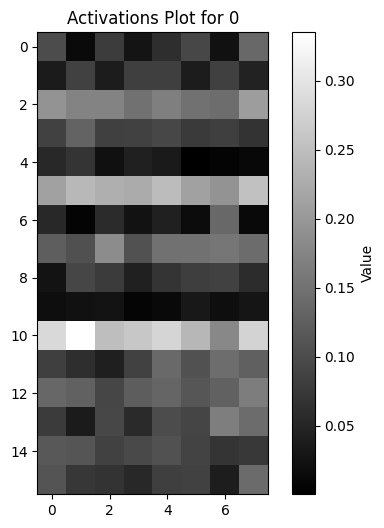

64 values in Layer 3. Geometry: (16, 4)


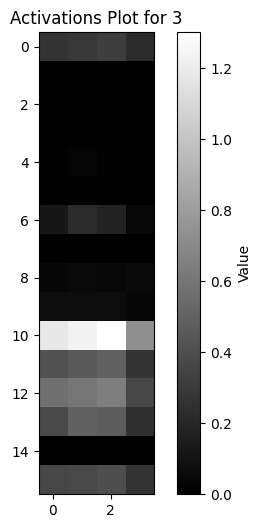

64 values in Layer 6. Geometry: (16, 4)


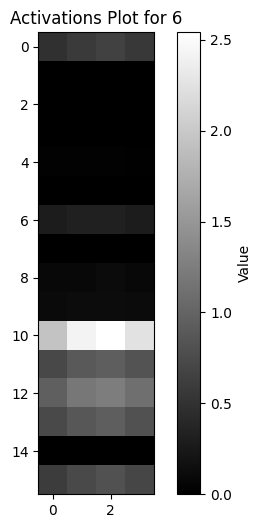

32 values in Layer 9. Geometry: (16, 2)


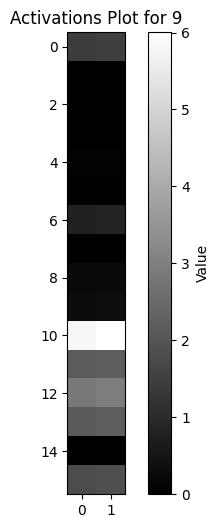

32 values in Layer 12. Geometry: (16, 2)


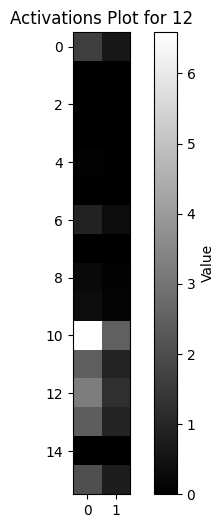

32 values in Layer 15. Geometry: (16, 2)


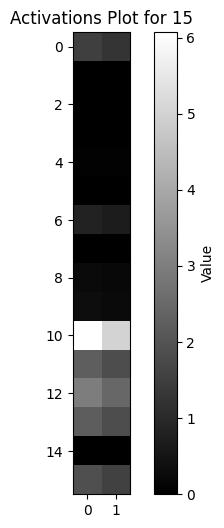

In [27]:
activations, mean_activations, layer_sizes = get_activations(net=model, fun_control=fun_control, batch_size=batch_size, device = "cpu")
plot_nn_values_scatter(nn_values=activations, layer_sizes=layer_sizes, nn_values_names="Activations")